<a href="https://colab.research.google.com/github/skl30misha/data-science-projects-/blob/main/machine-learning/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Purpose
Your task is to predict whether a passenger survived during the Titanic disaster or not. For each test, you should predict the value of the variable as 0 or 1.

# Мета
Ваше завдання передбачити, чи вижив пасажир під час катастрофи Титаніка чи ні. Для кожного з тестів ви повинні передбачити значення змінної 0 або 1.

In [122]:
!pip install scikeras


In [123]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from xgboost import XGBRegressor
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier


from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve, recall_score, precision_score
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RepeatedKFold

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from lightgbm import LGBMClassifier

from sklearn.feature_selection import mutual_info_classif

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy


# Опис датасету

     survival - Survival - Вижив (0 or 1)

     pclass - Ticket class - Клас квитка (1 = 1st, 2 = 2nd, 3 = 3rd)
     Indicator of socio-economic status
     1 = Upper
     2 = Average
     3 = Lower

     sex - Gender - Стать

     Age - Age in years - Вік

     Якщо значення віку менше 1, то це значення представляється у вигляді десяткового дробу
      Якщо вік орієнтовний або приблизний, то він буде записаний як xx.5.
     Наприклад, якщо вік оцінюється як 20 років, але точного значення немає, то буде написано 20,5.


     sibsp - Number of brothers and sisters / spouses on board - кількість братів і сестер пасажира

     parch - Number of parents/children on board кількість батьків/дітей на борту

     ticket - Ticket number номер квитка

     fare - Passenger fare - вартість квитка

     cabin - Cabin number - номер каюти

     embarked - Port of embarkation - порт посадки
                C = Cherbourg,
                Q = Queenstown,
                S = Southampton

In [ ]:
params = {'figure.figsize' : (16,10),
          'font.size' : 12,
          'axes.titlesize': 20}

bbox = {'boxstyle' : 'round',
        'pad' : 0.5,
        'facecolor' : 'white',
        'edgecolor' : 'black',
        'linewidth' : 1.5,
        'alpha' : 1}

matplotlib.rcParams.update(params)
%matplotlib inline

In [ ]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/DS_Project_titanic_survival_model')

Mounted at /content/drive


In [17]:
df = pd.read_csv('train.csv')

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Viewing data

In [19]:
df = df.drop('PassengerId', axis = 1)

In [20]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
df.shape

(891, 11)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [23]:
data = {
        'Not NaN' : df.notna().sum(),
        'NaN' : df.isna().sum(),
        '% NaN' : round((df.isna().sum() / df.shape[0])*100,2)
       }

data = pd.DataFrame(data)
data

,Not NaN,NaN,% NaN
Survived,891,0,0.00
Pclass,891,0,0.00
Name,891,0,0.00
Sex,891,0,0.00
Age,714,177,19.87
SibSp,891,0,0.00
Parch,891,0,0.00
Ticket,891,0,0.00
Fare,891,0,0.00
Cabin,204,687,77.10


In [24]:
df['Cabin'].value_counts()

,count
Cabin,
G6,4
C23 C25 C27,4
B96 B98,4
F2,3
D,3
...,...
E17,1
A24,1
C50,1


Є випадки, де вказано кілька кают. Це ознака заможніх, бронювання групи кают. Створимо такий параметр.

In [25]:
df['Count_Cabins'] = np.nan

In [26]:
df.loc[df['Cabin'].notna(),'Count_Cabins'] = df.loc[df['Cabin'].notna(),'Cabin'].apply(lambda x: len(x.split()))

In [27]:
df.Count_Cabins.value_counts()

,count
Count_Cabins,
1.0,180
2.0,16
3.0,6
4.0,2


In [28]:
df['Cabin'].str[0].value_counts()

,count
Cabin,
C,59
B,47
D,33
E,32
A,15
F,13
G,4
T,1



Значення цього стовпця складаються з наступного формату (class_number каюти, в якому живе пасажир)
Відповідно, замінимо цей стовпець просто значеннями класу каюти (типу каюти),
оскільки унікальних значень менше, і після перетворення стовпця ми заповнимо порожні значення


In [29]:
df['Cabin'] = df['Cabin'].str[0]

In [30]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Count_Cabins
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1.0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [31]:
df['Name'].apply(lambda x: x.split(", ")[1].split(".")[0]).value_counts()

,count
Name,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


    'Mr' is an abbreviation of the English word "Mister" and is used as a form of polite address to an adult man.

    'Miss' is a title that is usually used to address an unmarried woman or girl.

    'Mrs' is an abbreviation of the English word "Mistress" and is used to address a married woman.

    'Master' is a title that is used to refer to a boy or young man under the age of adolescence or adulthood.

    'Dr' is an abbreviation of the English word "Doctor" and is used to refer to a person with a doctorate degree, for example, a doctor or academic.

    'Rev' is an abbreviation of the English word "Reverend" and is used to address a clergyman, such as a priest or deacon.

    'Mlle' is an abbreviation of the French word "Mademoiselle" and is used to refer to an unmarried woman or girl in French.

    'Major' is a title used to address senior officers in the army or military forces.

    'Col' is an abbreviation of the English word "Colonel" and is used to refer to the highest-ranking officer in the army or military forces.

    'the Countess' is a title that denotes a countess, wife or widow of an earl.

    'Capt' is an abbreviation of the English word "Captain" and is used to refer to an officer of the Navy or the commander of a ship.

    'Ms' is a form of address to a woman who does not indicate her marital status (regardless of whether she is married or not).

    'Sir' is a form of polite address to a man, which is used when you want to express respect or when addressing a person of high status or authority.

    'Lady' is a title that is used to refer to a woman of lower noble origin or the daughter of an earl.

    'Mme' is an abbreviation of the French word "Madame" and is used to address a married woman in French.

    'Don' is a title used to refer to a man of lower noble origin or the owner of a land holding in Spanish-speaking countries.

    'Jonkheer' is the lowest title of the lowest aristocratic level used in the Netherlands and some other countries.

In [32]:
df['Name'] = df['Name'].apply(lambda x: x.split(", ")[1].split(".")[0])

In [33]:
df['Count'] = df['Ticket'].apply(lambda x: len(x.split()))

In [34]:
df.loc[df['Count']>1,'Ticket'] = df.loc[df['Count']>1,'Ticket'].apply(lambda x: x.split()[1])

In [35]:
df = df.drop('Count', axis = 1)

In [36]:
df = df.rename(columns={'Name': 'Status',
                        'Cabin': 'Cabin Type',
                        'Ticket':'Number_Ticket'})

In [37]:
df.head()

,Survived,Pclass,Status,Sex,Age,SibSp,Parch,Number_Ticket,Fare,Cabin Type,Embarked,Count_Cabins
0,0,3,Mr,male,22.0,1,0,21171,7.2500,NaN,S,NaN
1,1,1,Mrs,female,38.0,1,0,17599,71.2833,C,C,1.0
2,1,3,Miss,female,26.0,0,0,3101282,7.9250,NaN,S,NaN
3,1,1,Mrs,female,35.0,1,0,113803,53.1000,C,S,1.0
4,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,NaN


In [38]:
df.dtypes

,0
Survived,int64
Pclass,int64
Status,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Number_Ticket,object
Fare,float64
Cabin Type,object


In [39]:
df.loc[df['Number_Ticket'] == '2.', 'Number_Ticket'] = 2

In [40]:
df.loc[df['Number_Ticket'] == 'LINE', 'Number_Ticket'] = 0

In [41]:
df.loc[df['Number_Ticket'] == 'Basle', 'Number_Ticket'] = 0

In [42]:
df['Number_Ticket'] = df['Number_Ticket'].astype('int')

In [43]:
df.dtypes

,0
Survived,int64
Pclass,int64
Status,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Number_Ticket,int64
Fare,float64
Cabin Type,object


In [44]:
# Кількість значень NaN
data = {
        'Not NaN' : df.notna().sum(),
        'NaN' : df.isna().sum(),
        '% NaN' : round((df.isna().sum() / df.shape[0])*100,2)
       }

data = pd.DataFrame(data)
data

,Not NaN,NaN,% NaN
Survived,891,0,0.00
Pclass,891,0,0.00
Status,891,0,0.00
Sex,891,0,0.00
Age,714,177,19.87
SibSp,891,0,0.00
Parch,891,0,0.00
Number_Ticket,891,0,0.00
Fare,891,0,0.00
Cabin Type,204,687,77.10


In [45]:
df.head()

,Survived,Pclass,Status,Sex,Age,SibSp,Parch,Number_Ticket,Fare,Cabin Type,Embarked,Count_Cabins
0,0,3,Mr,male,22.0,1,0,21171,7.2500,NaN,S,NaN
1,1,1,Mrs,female,38.0,1,0,17599,71.2833,C,C,1.0
2,1,3,Miss,female,26.0,0,0,3101282,7.9250,NaN,S,NaN
3,1,1,Mrs,female,35.0,1,0,113803,53.1000,C,S,1.0
4,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,NaN


# EDA

In [46]:
# Червоні - загиблі, зелені - ті, що вижили

palette  = ['#ff0000','#008000']
sns.color_palette(palette)

[(1.0, 0.0, 0.0), (0.0, 0.5019607843137255, 0.0)]

<ipython-input-47-e871056d0e55>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p1 = sns.countplot(data = df,


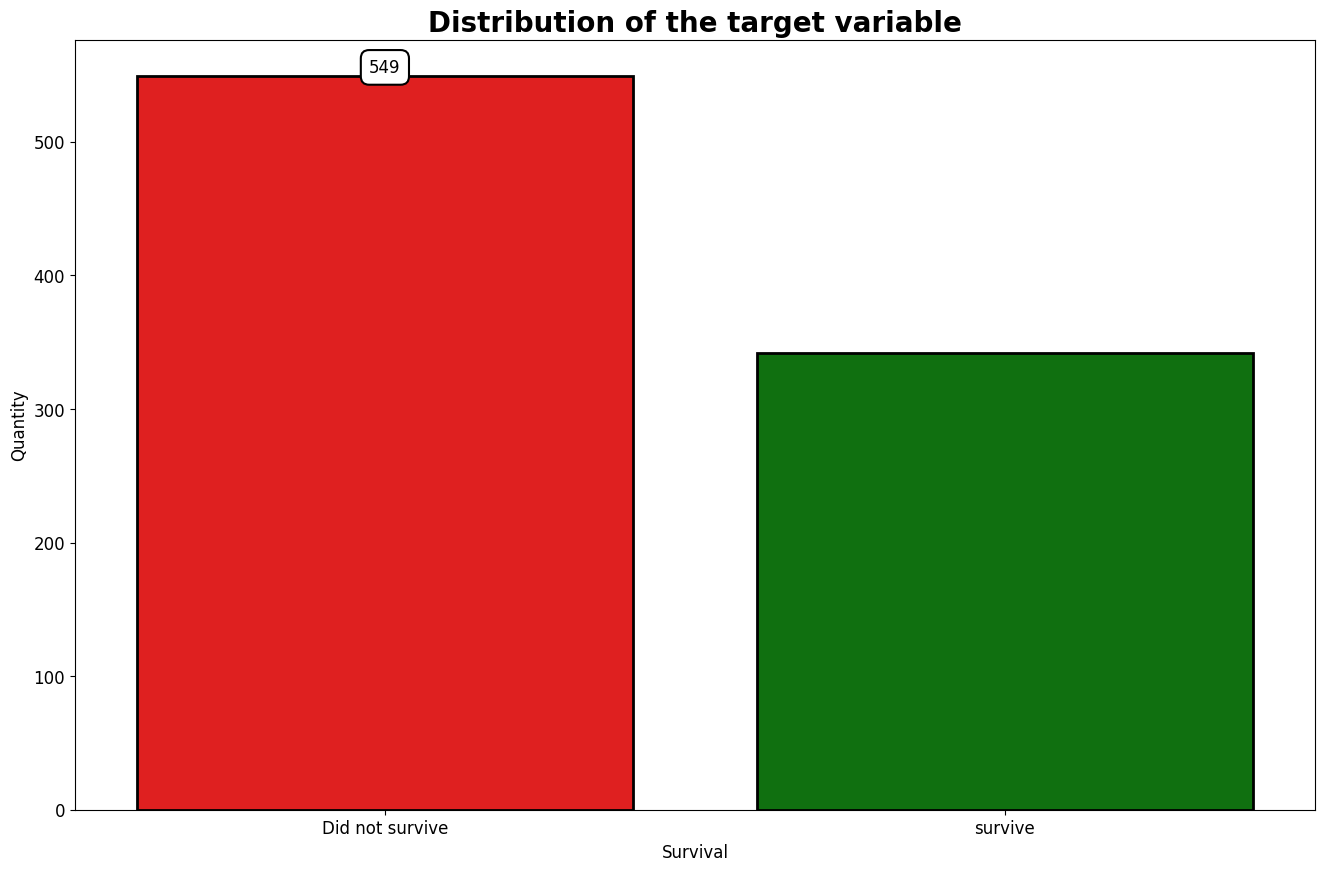

In [47]:
fig = plt.subplots()
p1 = sns.countplot(data = df,
             x = 'Survived',
             palette = palette,
             edgecolor = 'black',
             linewidth = 2)
p1.bar_label(p1.containers[0], bbox = bbox)

plt.title('Distribution of the target variable', fontweight = 'bold')
plt.xlabel('Survival')
plt.ylabel('Quantity')
plt.xticks(ticks=[0, 1], labels=['Did not survive','survive'])

plt.show()

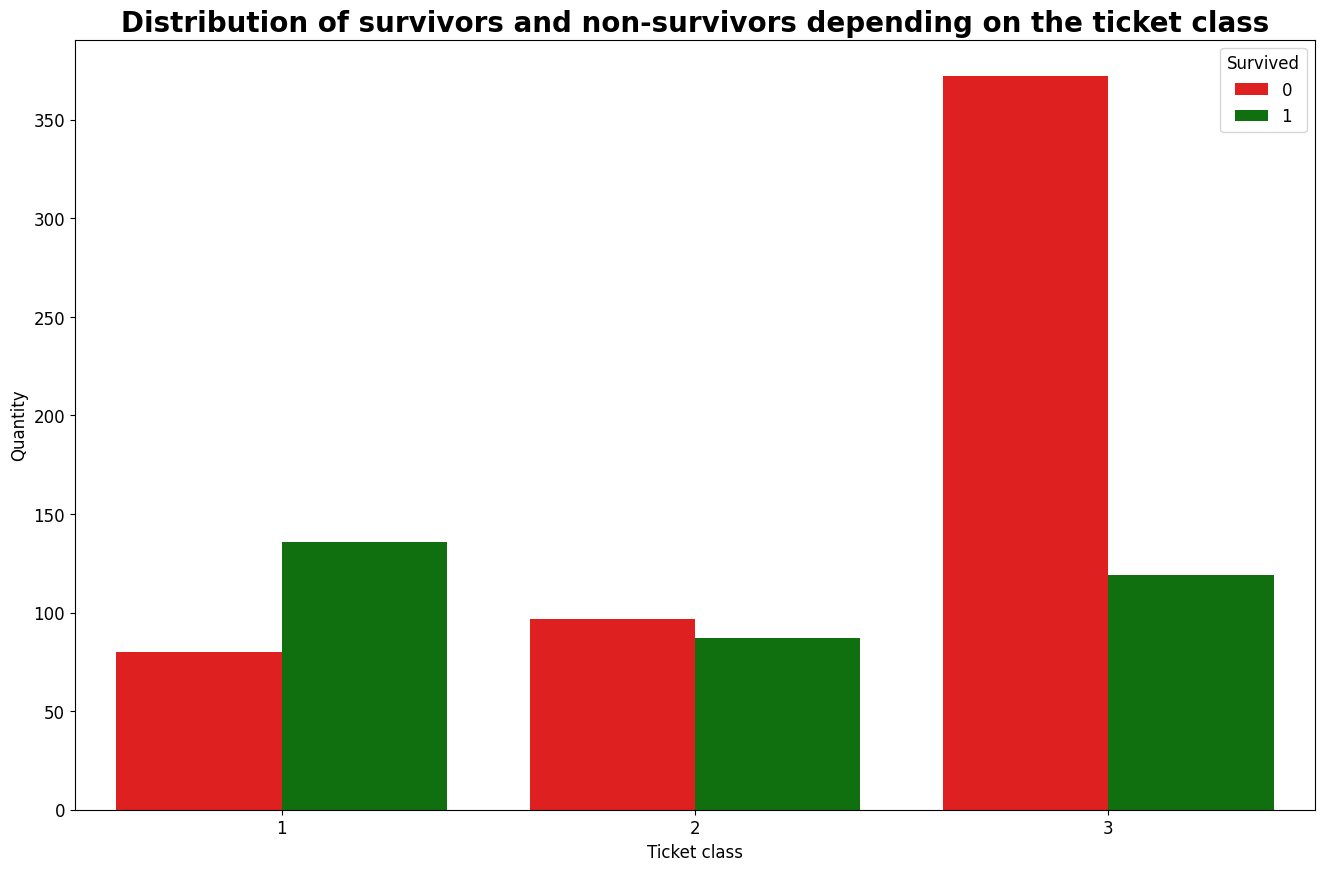

In [48]:
sns.countplot(data = df,
             x = 'Pclass',
             hue = 'Survived',
             palette = palette)

plt.title('Distribution of survivors and non-survivors depending on the ticket class',fontweight = 'bold')
plt.ylabel('Quantity')
plt.xlabel('Ticket class')
plt.show()

Серед тих, что був у третьому класі, більшість не вижили. І навпаки, серед тих, что був в 1 класі - більшість вижили.

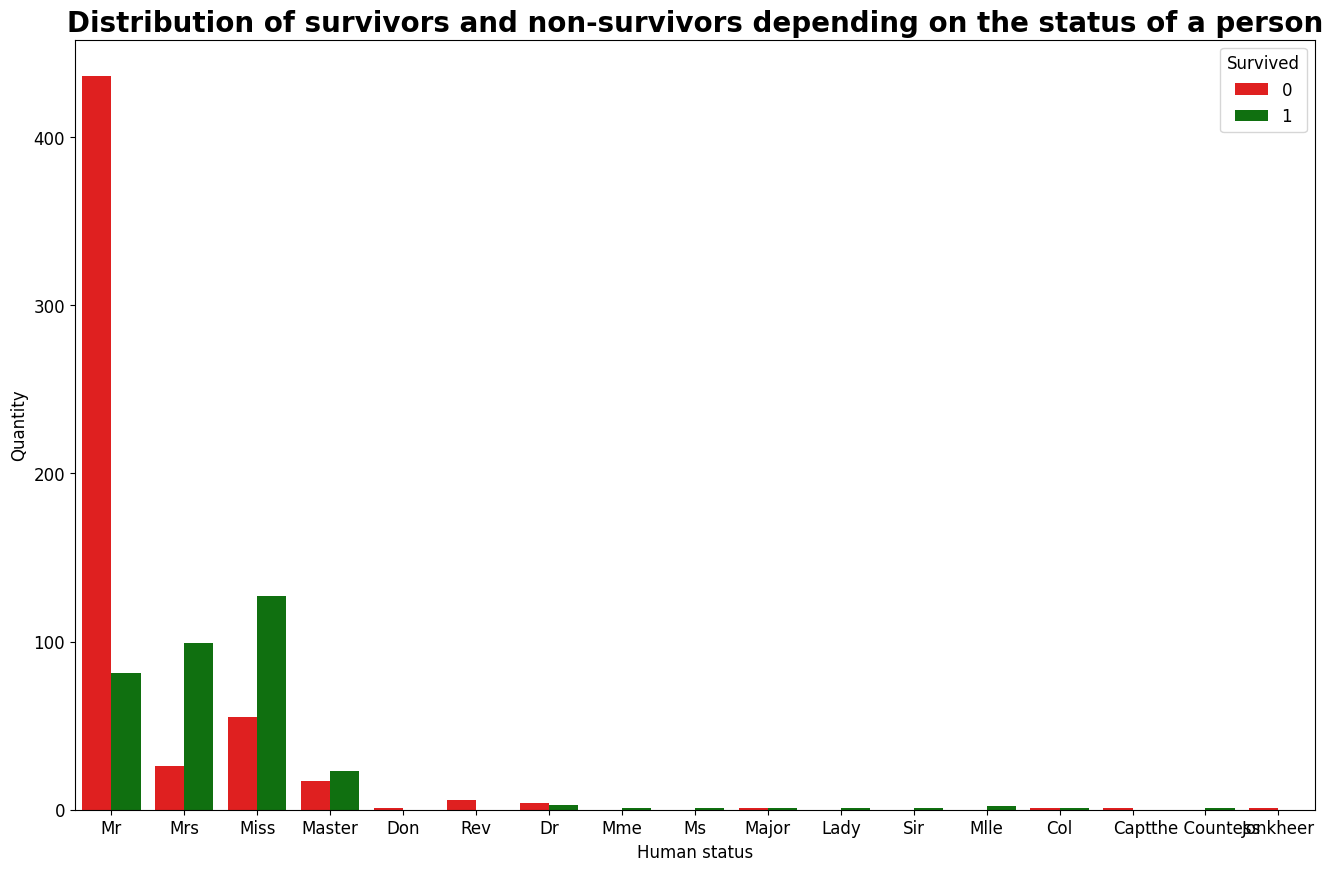

In [49]:
sns.countplot(data = df,
             x = 'Status',
             hue = 'Survived',
             palette = palette)

plt.title('Distribution of survivors and non-survivors depending on the status of a person',fontweight = 'bold')
plt.ylabel('Quantity')
plt.xlabel('Human status')
plt.show()

    Серед Mr, Dr - більшість загинули
    Серед Mrs, Miss, Master - більшість вижили

    Ніхто з Don, Rev, Capt,Jonkheer не вижив
    Вижили всі зі статусами Me,Ms,Lady,Sir,Mille,the Countess



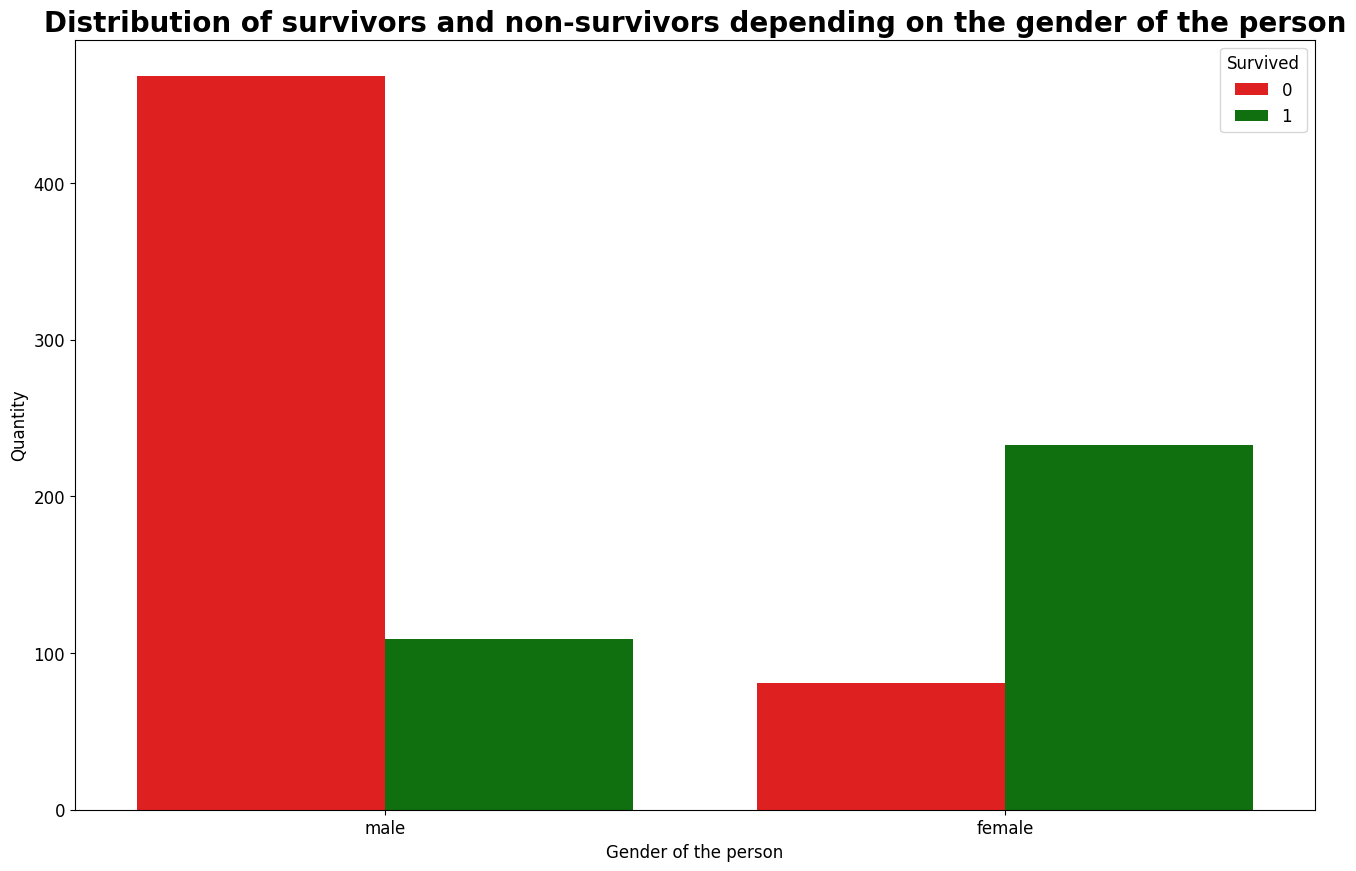

In [50]:
sns.countplot(data = df,
             x = 'Sex',
             hue = 'Survived',
             palette = palette)

plt.title('Distribution of survivors and non-survivors depending on the gender of the person',fontweight = 'bold')
plt.ylabel('Quantity')
plt.xlabel('Gender of the person')
plt.show()

Більшість чоловіків загинули, а більшість жінок врятувалася.


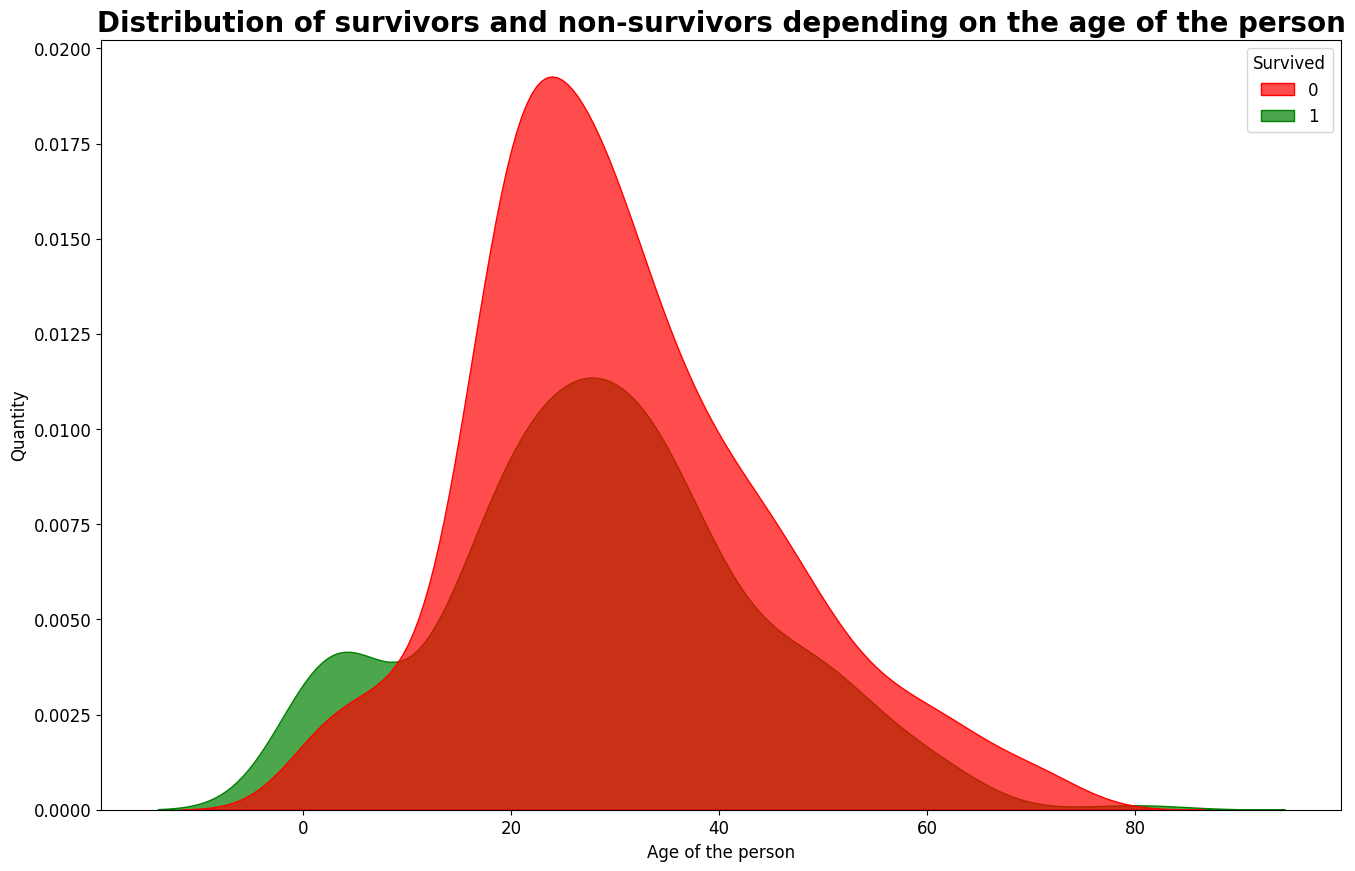

In [51]:
sns.kdeplot(data = df,
           x = 'Age',
           hue = 'Survived',
           fill = True,
           alpha = 0.7,
           palette = palette)

plt.title('Distribution of survivors and non-survivors depending on the age of the person',fontweight = 'bold')
plt.ylabel('Quantity')
plt.xlabel('Age of the person')
plt.show()

Більшість дітей вижили

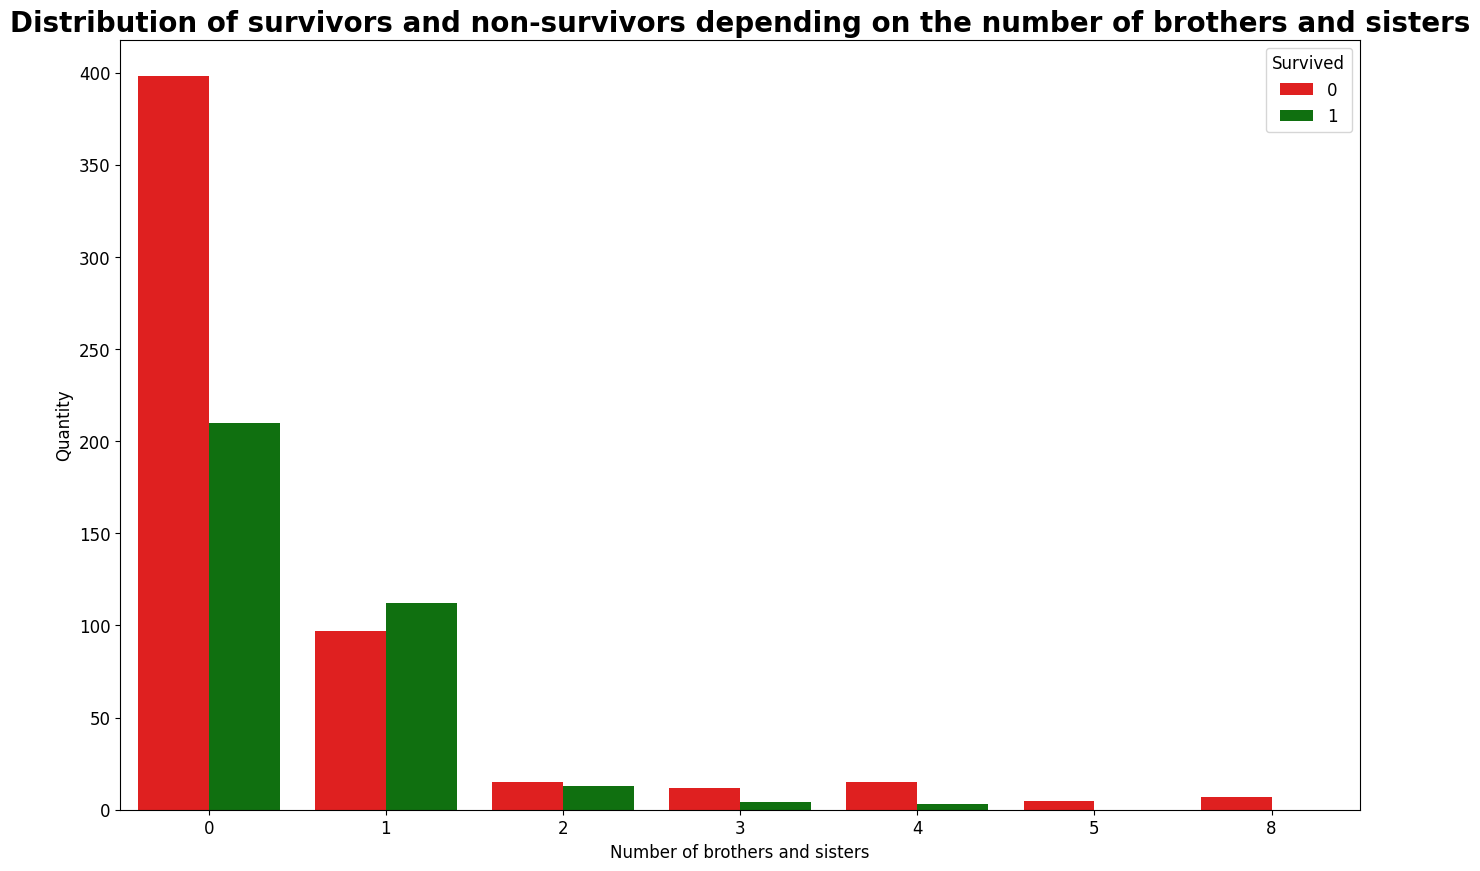

In [52]:
sns.countplot(data = df,
             x = 'SibSp',
             hue = 'Survived',
             palette = palette)

plt.title('Distribution of survivors and non-survivors depending on the number of brothers and sisters',fontweight = 'bold')
plt.ylabel('Quantity')
plt.xlabel('Number of brothers and sisters')
plt.show()


    Серед тих, чтьо мав 0, 2, 3, 4 братів і сестер, більшість не вижили
    Серед тих, что мав 1 брата чи сестру, більшість вижили
    Серед тих, что мав 5 чи 8 братів та сестер, ніхто не вижив


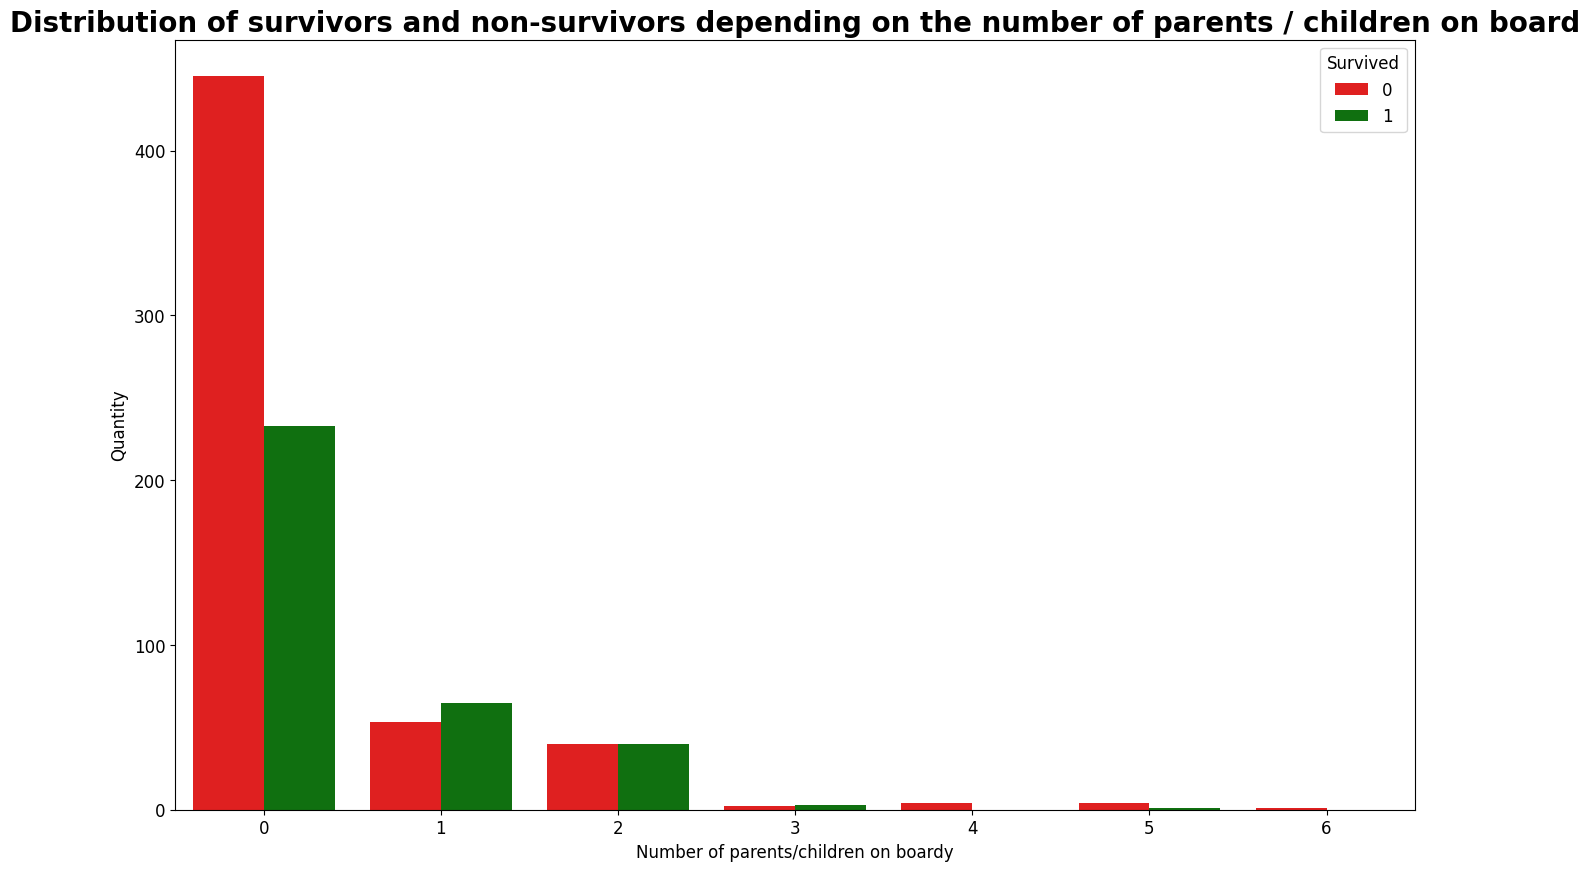

In [53]:
sns.countplot(data = df,
             x = 'Parch',
             hue = 'Survived',
             palette = palette)

plt.title('Distribution of survivors and non-survivors depending on the number of parents / children on board',fontweight = 'bold')
plt.ylabel('Quantity')
plt.xlabel('Number of parents/children on boardу')
plt.show()


    Серед тих, хто мав 0, 4, 5, 6 батьків чи дітей на борту, більшість загинула
    Серед тих, что мав 1 або 3 дітей на борту, більшість вижила
    У тих хто мав 2 батьків чи дітей, шанси вижити будли 50/50


In [54]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Number_Ticket,Fare,Count_Cabins
count,891.000000,891.000000,714.000000,891.000000,891.000000,8.910000e+02,891.000000,204.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,2.552204e+05,32.204208,1.166667
std,0.486592,0.836071,14.526497,1.102743,0.806057,5.694927e+05,49.693429,0.507740
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000e+00,0.000000,1.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,1.351850e+04,7.910400,1.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,1.108130e+05,14.454200,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,3.470735e+05,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,3.101317e+06,512.329200,4.000000


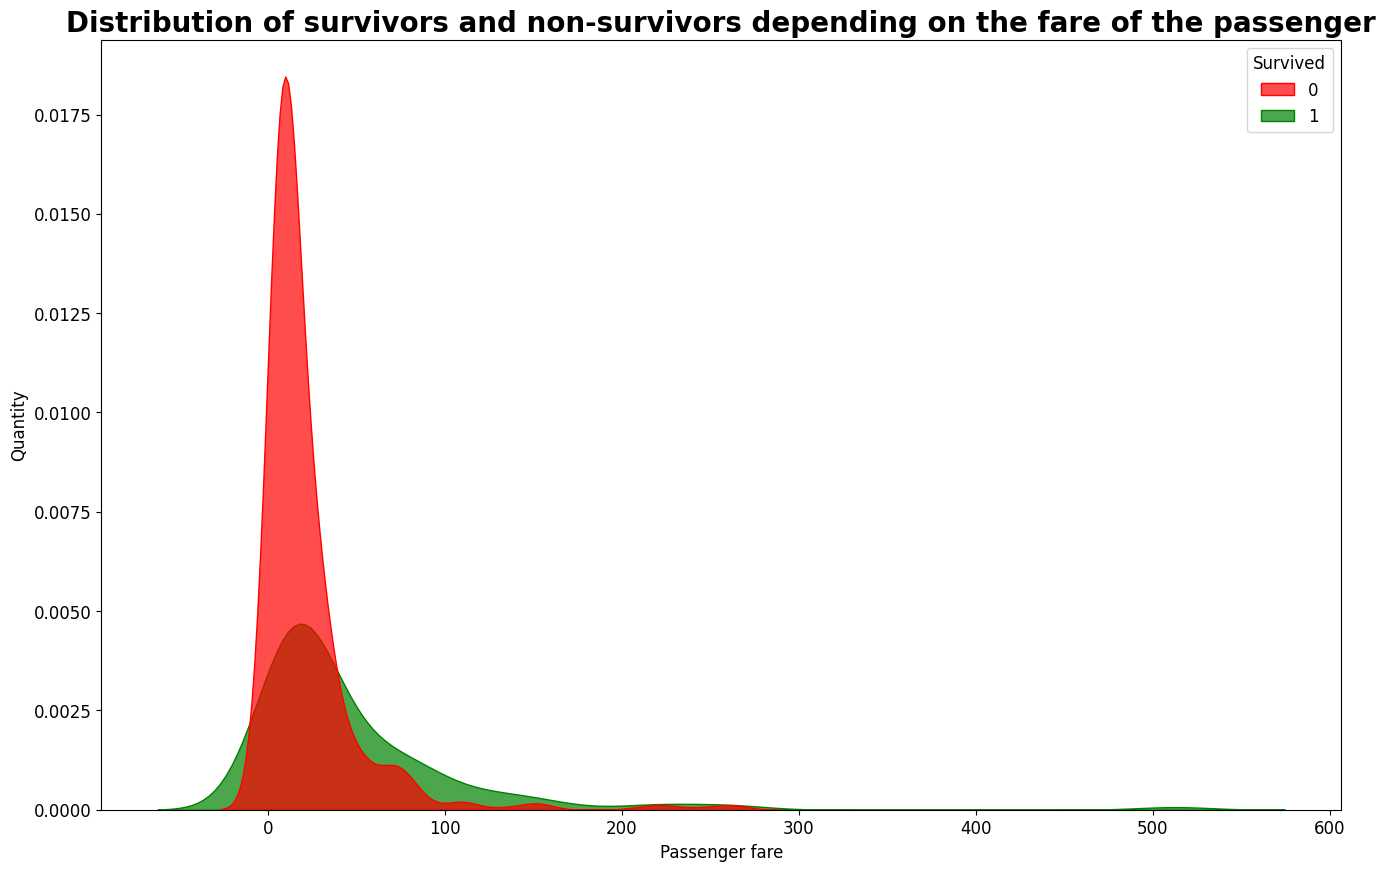

In [55]:
sns.kdeplot(data = df,
           x = 'Fare',
           hue = 'Survived',
           fill = True,
           alpha = 0.7,
           palette = palette)

plt.title('Distribution of survivors and non-survivors depending on the fare of the passenger',fontweight = 'bold')
plt.ylabel('Quantity')
plt.xlabel('Passenger fare')
# plt.xticks(range(0,600,20))
plt.show()


    Серед тих, у кого ціна білета була від 0 до 40, більшість загинули
    Серед тих, хто мав дорожчі квитки, більшість вижила


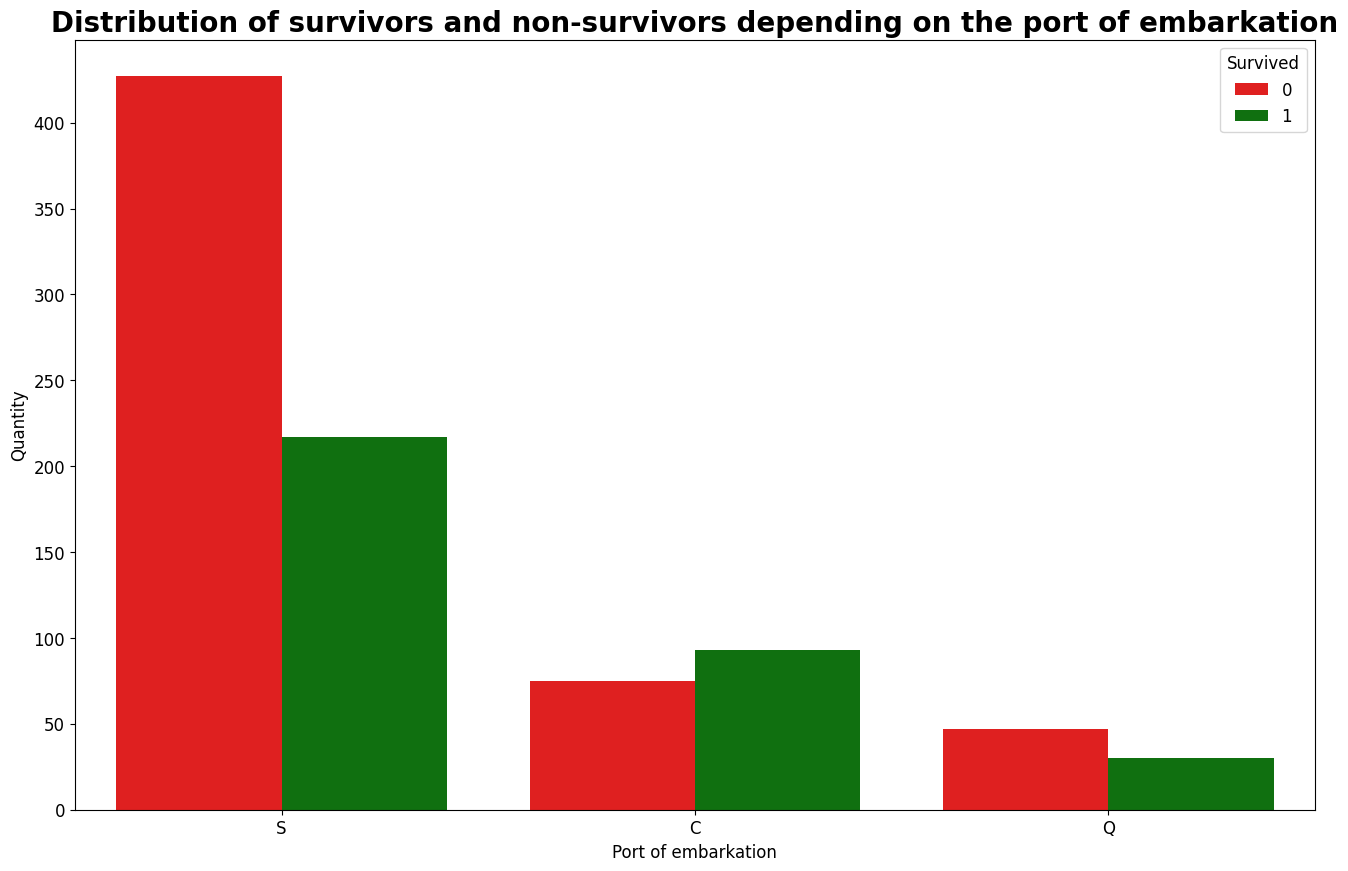

In [56]:
sns.countplot(data = df,
             x = 'Embarked',
             hue = 'Survived',
             palette = palette)

plt.title('Distribution of survivors and non-survivors depending on the port of embarkation',fontweight = 'bold')
plt.ylabel('Quantity')
plt.xlabel('Port of embarkation')
plt.show()


    C = Cherbourg,
    Q = Queenstown,
    S = Southampton

    Серед тих, хто сів в порту Southampton чи Queenstown більшість загинули
    Серед тих, хто сів у Cherbourg - більшість вижили


In [57]:
df.head()

,Survived,Pclass,Status,Sex,Age,SibSp,Parch,Number_Ticket,Fare,Cabin Type,Embarked,Count_Cabins
0,0,3,Mr,male,22.0,1,0,21171,7.2500,NaN,S,NaN
1,1,1,Mrs,female,38.0,1,0,17599,71.2833,C,C,1.0
2,1,3,Miss,female,26.0,0,0,3101282,7.9250,NaN,S,NaN
3,1,1,Mrs,female,35.0,1,0,113803,53.1000,C,S,1.0
4,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,NaN


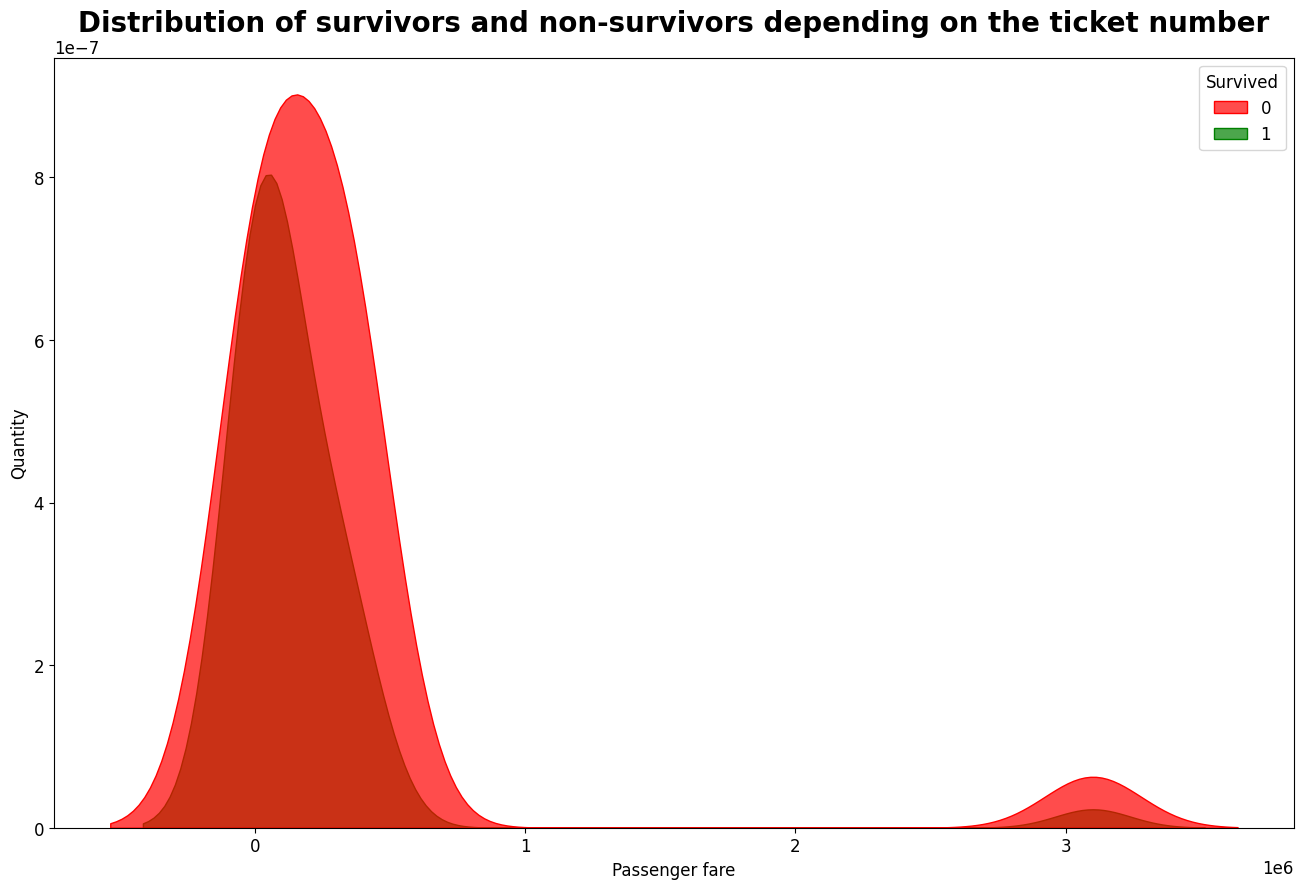

In [58]:
sns.kdeplot(data = df,
           x = 'Number_Ticket',
           hue = 'Survived',
           fill = True,
           alpha = 0.7,
           palette = palette)

plt.title('Distribution of survivors and non-survivors depending on the ticket number',fontweight = 'bold')
plt.ylabel('Quantity')
plt.xlabel('Passenger fare')
plt.show()

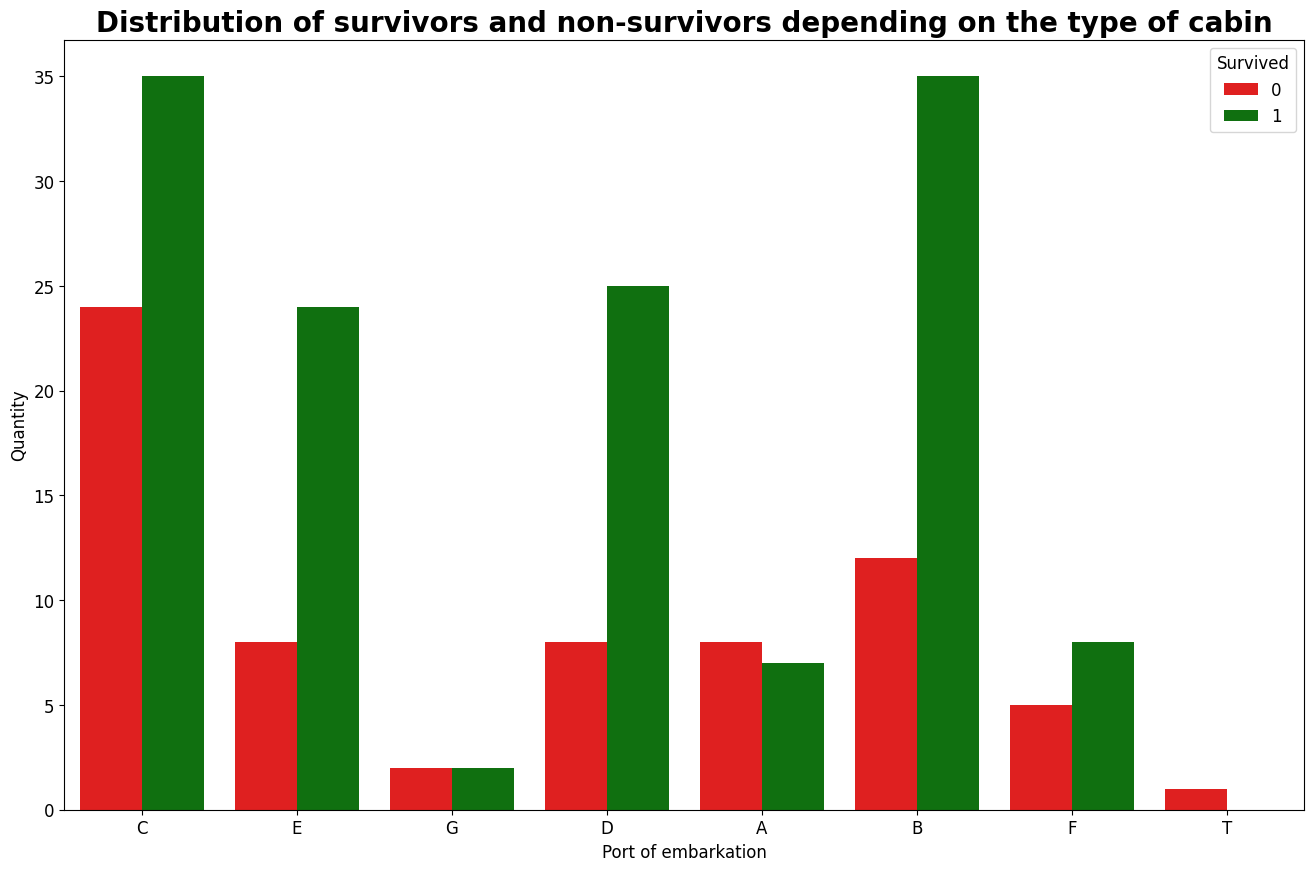

In [59]:
sns.countplot(data = df[df['Cabin Type'].notna()],
             x = 'Cabin Type',
             hue = 'Survived',
             palette = palette)

plt.title('Distribution of survivors and non-survivors depending on the type of cabin',fontweight = 'bold')
plt.ylabel('Quantity')
plt.xlabel('Port of embarkation')
plt.show()

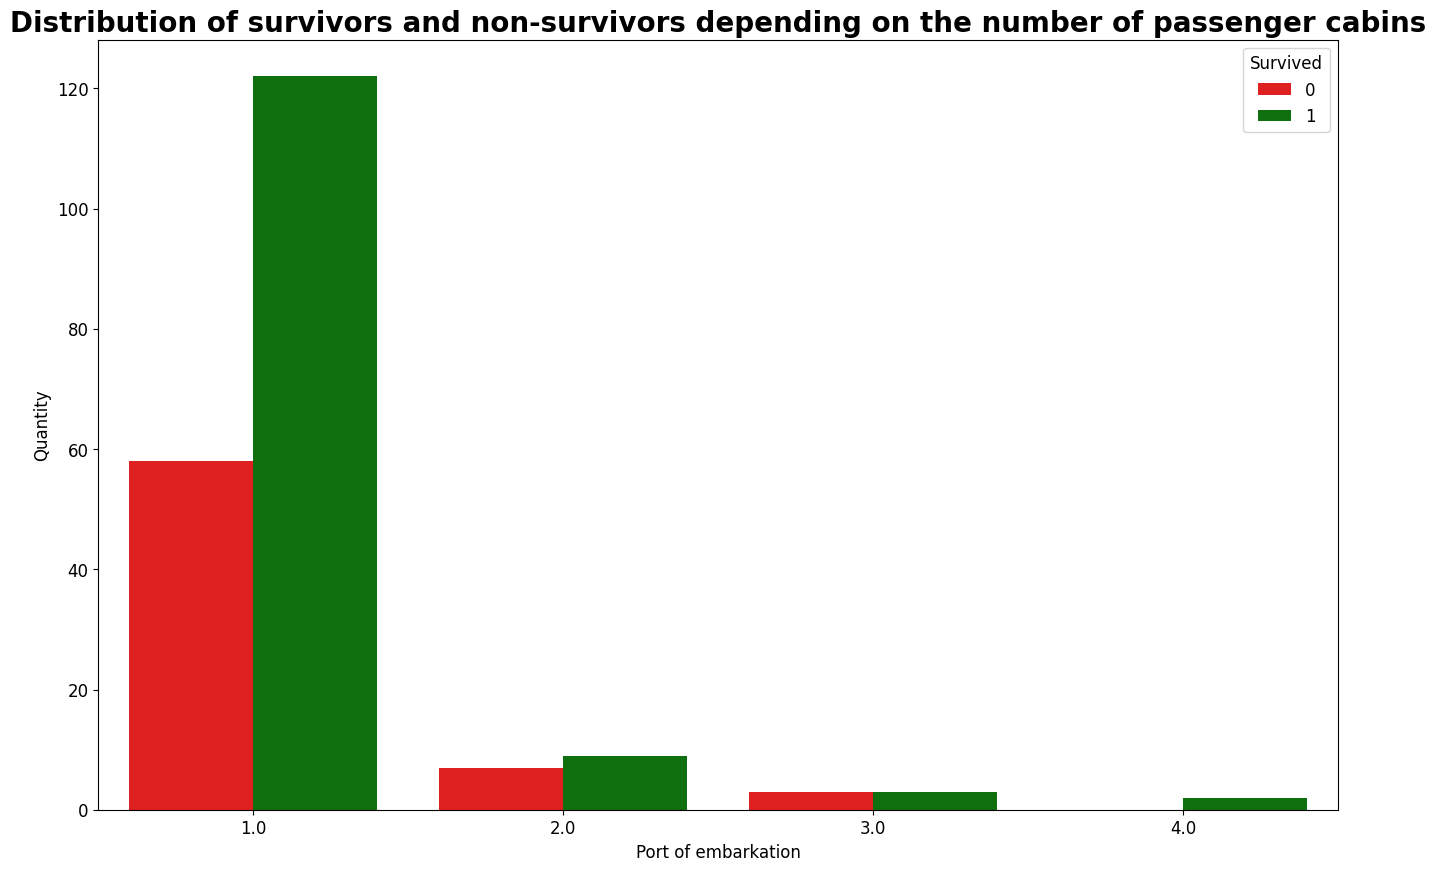

In [ ]:
sns.countplot(data = df[df['Count_Cabins'].notna()],
             x = 'Count_Cabins',
             hue = 'Survived',
             palette = palette)

plt.title('Distribution of survivors and non-survivors depending on the number of passenger cabins',fontweight = 'bold')
plt.ylabel('Quantity')
plt.xlabel('Port of embarkation')
plt.show()

# Заповнення пропусків

In [ ]:

data = {
        'Not NaN' : df.notna().sum(),
        'NaN' : df.isna().sum(),
        '% NaN' : round((df.isna().sum() / df.shape[0])*100,2)
       }

data = pd.DataFrame(data)
data

,Not NaN,NaN,% NaN
Survived,891,0,0.00
Pclass,891,0,0.00
Status,891,0,0.00
Sex,891,0,0.00
Age,714,177,19.87
SibSp,891,0,0.00
Parch,891,0,0.00
Number_Ticket,891,0,0.00
Fare,891,0,0.00
Cabin Type,204,687,77.10


In [60]:
lst = df['Status'].value_counts().index
mean_age = []

for l in lst:
    mean_age.append(df[(df['Status'] == l) & (df['Age'].notna())]['Age'].mean())

<Axes: xlabel='Status', ylabel='Age'>

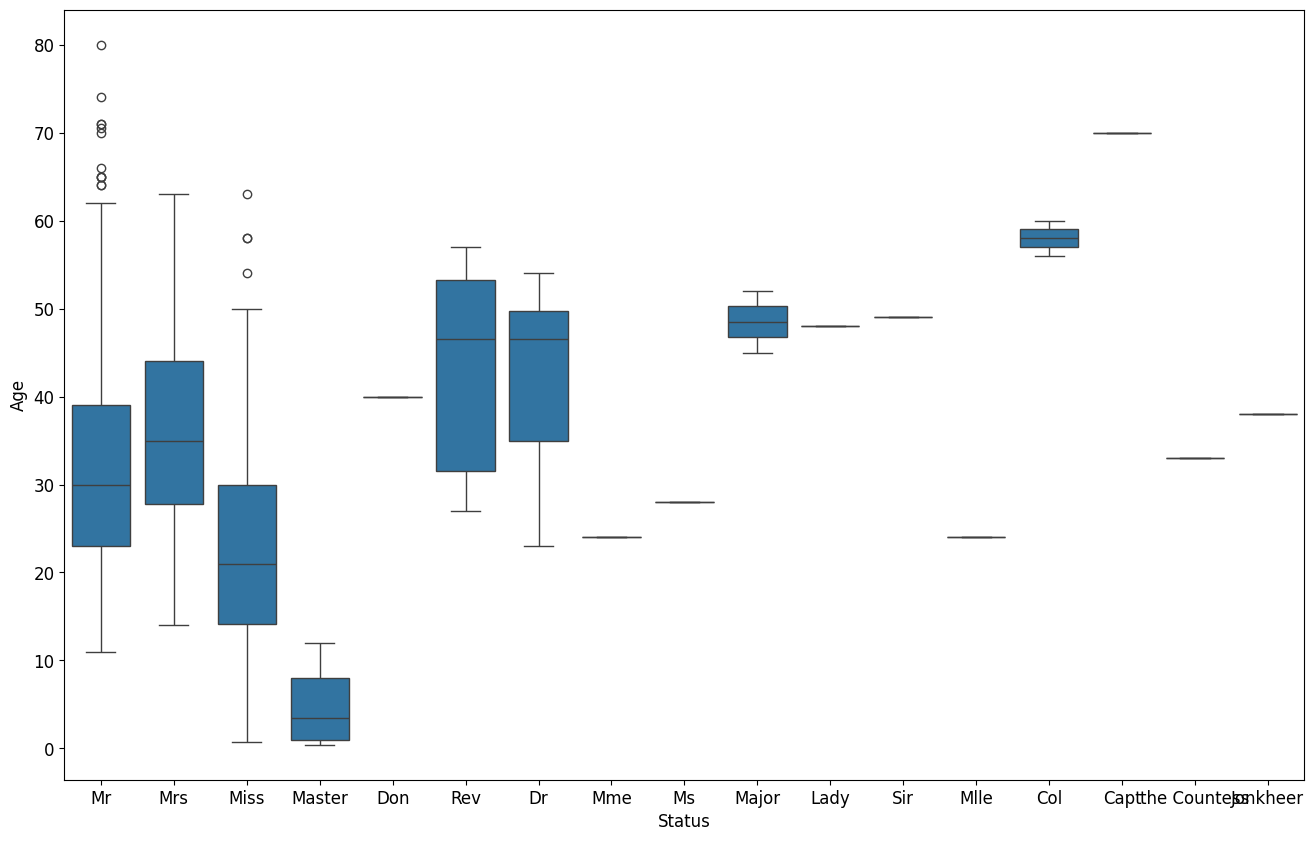

In [61]:
sns.boxplot(df, x="Status", y="Age")

In [62]:

data = {
        'mean_age' : mean_age
       }

data = pd.DataFrame(data)
data = data.set_index(df['Status'].value_counts().index)
data['mean_age'] = data['mean_age'].astype('int')
data

,mean_age
Status,
Mr,32
Miss,21
Mrs,35
Master,4
Dr,42
Rev,43
Col,58
Mlle,24
Major,48


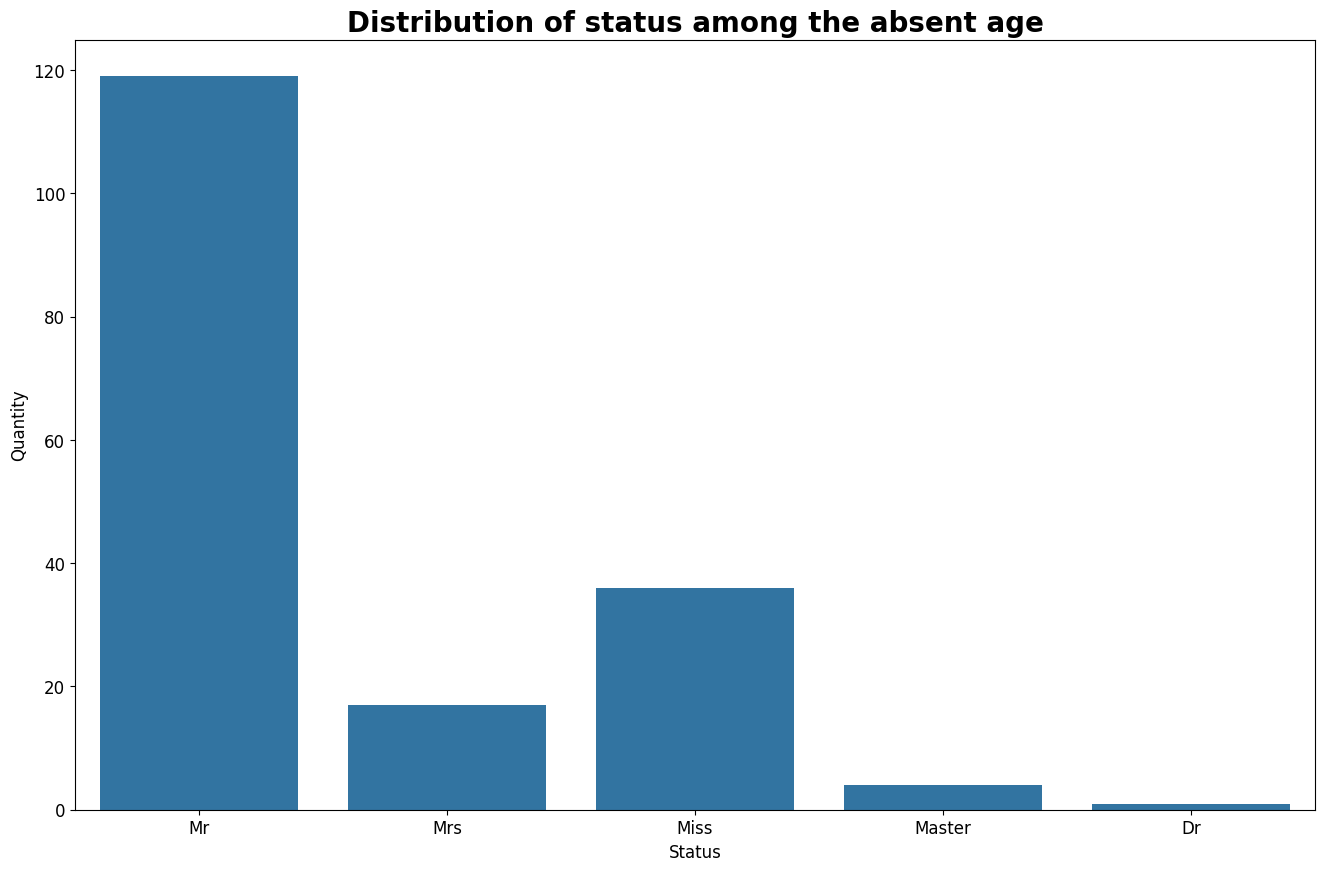

In [63]:
sns.countplot(data = df[df['Age'].isna()],
             x = 'Status')
plt.title('Distribution of status among the absent age', fontweight = 'bold')
plt.xlabel('Status')
plt.ylabel('Quantity')
plt.show()

In [64]:
df['Status'].nunique()

17


    Вік пропущений лише в наступних статусах:
    Mr
    Mrs
    Miss
    Master
    Dr

    Відповідно заповнюватимемо лише ці групи

In [65]:
lst = df[df['Age'].isna()]['Status'].value_counts().index

for l in lst:
    df.loc[(df['Age'].isna())&(df['Status'] == l),'Age'] = df.loc[(df['Age'].isna())& (df['Status'] == l),'Age'].fillna(data.loc[l][0])

<ipython-input-65-1a7bcad024ad>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.loc[(df['Age'].isna())&(df['Status'] == l),'Age'] = df.loc[(df['Age'].isna())& (df['Status'] == l),'Age'].fillna(data.loc[l][0])
<ipython-input-65-1a7bcad024ad>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.loc[(df['Age'].isna())&(df['Status'] == l),'Age'] = df.loc[(df['Age'].isna())& (df['Status'] == l),'Age'].fillna(data.loc[l][0])
<ipython-input-65-1a7bcad024ad>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with Dat

In [ ]:
df.isna().sum()

Survived           0
Pclass             0
Status             0
Sex                0
Age                0
SibSp              0
Parch              0
Number_Ticket      0
Fare               0
Cabin Type       687
Embarked           2
Count_Cabins     687
dtype: int64


Як бачимо пропуски віку відсутні.
Заповнимо 2 наявні пропуски в колонці Embedded


In [66]:
df[df['Embarked'].isna()]

,Survived,Pclass,Status,Sex,Age,SibSp,Parch,Number_Ticket,Fare,Cabin Type,Embarked,Count_Cabins
61,1,1,Miss,female,38.0,0,0,113572,80.0,B,NaN,1.0
829,1,1,Mrs,female,62.0,0,0,113572,80.0,B,NaN,1.0


In [67]:
Survived = df[df['Survived'] == 1]['Embarked'].mode()[0]
Pclass = df[df['Pclass'] == 1]['Embarked'].mode()[0]
Status_1 = df[df['Status'] == 'Miss']['Embarked'].mode()[0]
Status_2 = df[df['Status'] == 'Mrs']['Embarked'].mode()[0]
Sex = df[df['Sex'] == 'female']['Embarked'].mode()[0]
Age_38 = df[df['Age'] == 38]['Embarked'].mode()[0]
Age_62 = df[df['Age'] == 62]['Embarked'].mode()[0]
SibSp = df[df['SibSp'] == 0]['Embarked'].mode()[0]

lst = [Survived,Pclass,Status_1,Status_2,Sex,Age_38,Age_62,SibSp]

lst

['S', 'S', 'S', 'S', 'S', 'S', 'S', 'S']

In [68]:
df.loc[df['Embarked'].isna(),'Embarked'] = df.loc[df['Embarked'].isna(),'Embarked'].fillna('S')

In [69]:
index = df['Pclass'].value_counts().sort_index().index
pclass = []

for i in index:
    pclass.append(df[df['Pclass'] == i]['Cabin Type'].mode()[0])


Cabin_Type = {
        'Mode': pclass,

       }

Cabin_Type = pd.DataFrame(Cabin_Type)
Cabin_Type = Cabin_Type.set_index(index)
Cabin_Type

,Mode
Pclass,
1,C
2,F
3,F



    В 1 класі - тип каюти C
    В 2 класі - тип каюти - F
    В 3 класі - тип каюти - F


In [70]:
for i in Cabin_Type.index:
    df.loc[(df['Cabin Type'].isna())&(df['Pclass'] == i),'Cabin Type'] = df.loc[(df['Cabin Type'].isna())&(df['Pclass'] == i),'Cabin Type'].fillna(Cabin_Type.loc[i][0])

<ipython-input-70-e4fdaf776f23>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.loc[(df['Cabin Type'].isna())&(df['Pclass'] == i),'Cabin Type'] = df.loc[(df['Cabin Type'].isna())&(df['Pclass'] == i),'Cabin Type'].fillna(Cabin_Type.loc[i][0])
<ipython-input-70-e4fdaf776f23>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.loc[(df['Cabin Type'].isna())&(df['Pclass'] == i),'Cabin Type'] = df.loc[(df['Cabin Type'].isna())&(df['Pclass'] == i),'Cabin Type'].fillna(Cabin_Type.loc[i][0])
<ipython-input-70-e4fdaf776f23>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, 

In [71]:
index = df['Cabin Type'].value_counts().sort_index().index
count = []
for i in index:
    count.append(df[df['Cabin Type'] == i]['Count_Cabins'].median())

Count_Cabins = {
        'Mode': count,

       }

Count_Cabins = pd.DataFrame(Count_Cabins)
Count_Cabins = Count_Cabins.set_index(index)
Count_Cabins

,Mode
Cabin Type,
A,1.0
B,1.0
C,1.0
D,1.0
E,1.0
F,1.0
G,1.0
T,1.0


In [72]:
for i in Count_Cabins.index:
    df.loc[(df['Count_Cabins'].isna())&(df['Cabin Type'] == i),'Count_Cabins'] = df.loc[(df['Count_Cabins'].isna())&(df['Cabin Type'] == i),'Count_Cabins'].fillna(Count_Cabins.loc[i][0])

<ipython-input-72-bda6c3e44cb1>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.loc[(df['Count_Cabins'].isna())&(df['Cabin Type'] == i),'Count_Cabins'] = df.loc[(df['Count_Cabins'].isna())&(df['Cabin Type'] == i),'Count_Cabins'].fillna(Count_Cabins.loc[i][0])
<ipython-input-72-bda6c3e44cb1>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.loc[(df['Count_Cabins'].isna())&(df['Cabin Type'] == i),'Count_Cabins'] = df.loc[(df['Count_Cabins'].isna())&(df['Cabin Type'] == i),'Count_Cabins'].fillna(Count_Cabins.loc[i][0])
<ipython-input-72-bda6c3e44cb1>:2: FutureWarning: Series.__getitem__ treating keys as positions 

In [73]:
# кількість NaN
data = {
        'Not NaN' : df.notna().sum(),
        'NaN' : df.isna().sum(),
        '% NaN' : round((df.isna().sum() / df.shape[0])*100,2)
       }

data = pd.DataFrame(data)
data

,Not NaN,NaN,% NaN
Survived,891,0,0.0
Pclass,891,0,0.0
Status,891,0,0.0
Sex,891,0,0.0
Age,891,0,0.0
SibSp,891,0,0.0
Parch,891,0,0.0
Number_Ticket,891,0,0.0
Fare,891,0,0.0
Cabin Type,891,0,0.0


In [74]:
df.dtypes

,0
Survived,int64
Pclass,int64
Status,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Number_Ticket,int64
Fare,float64
Cabin Type,object


# Кодування перемінних

In [75]:
df.describe(include="object")

,Status,Sex,Cabin Type,Embarked
count,891,891,891,891
unique,17,2,8,3
top,Mr,male,F,S
freq,517,577,660,646


In [76]:
df.Status.value_counts()

,count
Status,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


In [77]:
df_c = df.copy()

In [78]:
cat = ['Status','Sex','Embarked','Cabin Type']

for i in cat:
    unique = df[i].nunique()
    print(f'{i} = {unique} unique values')

Status = 17 unique values
Sex = 2 unique values
Embarked = 3 unique values
Cabin Type = 8 unique values


In [79]:
encoder = LabelEncoder()

In [80]:
for i in cat:
    df[i] = encoder.fit_transform(df[i])

In [81]:
for i in cat:
    unique = df[i].nunique()
    print(f'{i} = {unique} unique values')

Status = 17 unique values
Sex = 2 unique values
Embarked = 3 unique values
Cabin Type = 8 unique values


In [82]:
df.head()

,Survived,Pclass,Status,Sex,Age,SibSp,Parch,Number_Ticket,Fare,Cabin Type,Embarked,Count_Cabins
0,0,3,11,1,22.0,1,0,21171,7.2500,5,2,1.0
1,1,1,12,0,38.0,1,0,17599,71.2833,2,0,1.0
2,1,3,8,0,26.0,0,0,3101282,7.9250,5,2,1.0
3,1,1,12,0,35.0,1,0,113803,53.1000,2,2,1.0
4,0,3,11,1,35.0,0,0,373450,8.0500,5,2,1.0


In [83]:
df.dtypes

,0
Survived,int64
Pclass,int64
Status,int64
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Number_Ticket,int64
Fare,float64
Cabin Type,int64


In [84]:
df.head()

,Survived,Pclass,Status,Sex,Age,SibSp,Parch,Number_Ticket,Fare,Cabin Type,Embarked,Count_Cabins
0,0,3,11,1,22.0,1,0,21171,7.2500,5,2,1.0
1,1,1,12,0,38.0,1,0,17599,71.2833,2,0,1.0
2,1,3,8,0,26.0,0,0,3101282,7.9250,5,2,1.0
3,1,1,12,0,35.0,1,0,113803,53.1000,2,2,1.0
4,0,3,11,1,35.0,0,0,373450,8.0500,5,2,1.0


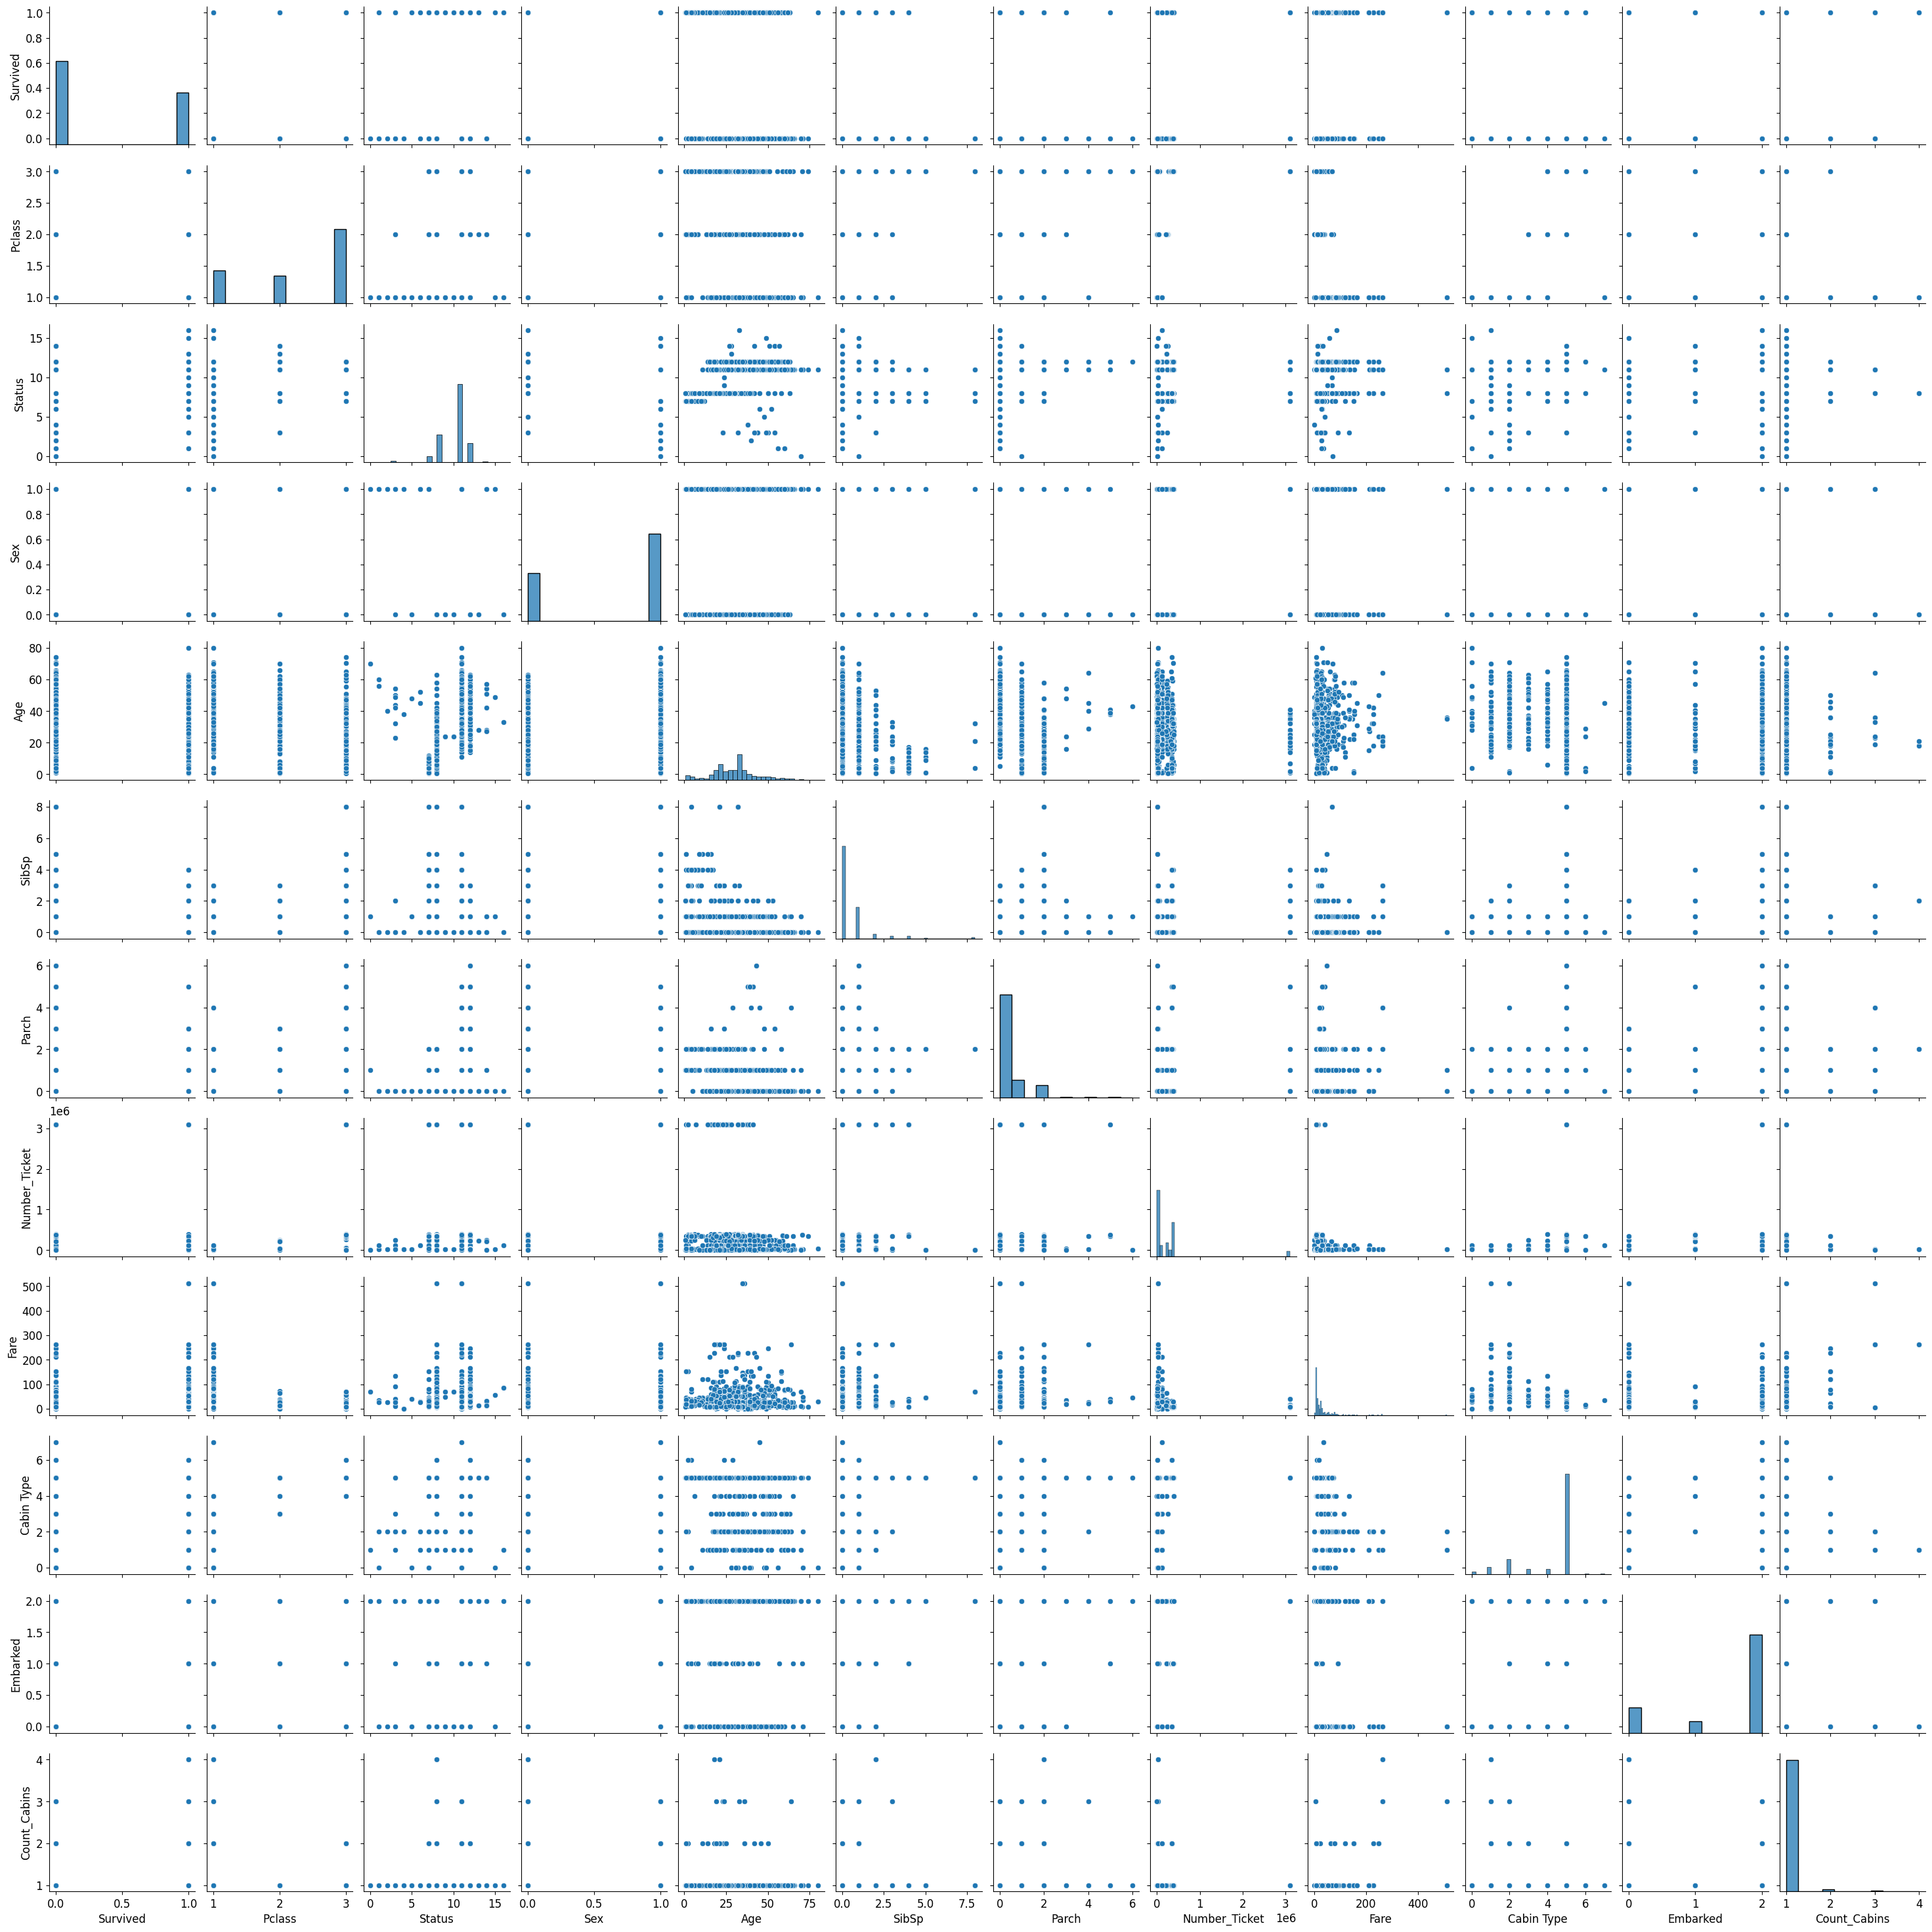

In [85]:
sns.pairplot(df)

# Splitting the data set into explanatory and target variables

In [86]:
X = df.drop('Survived',axis = 1)
y = df['Survived']

# Mutual information assessment


    mutual_info_classif-
    оцінка взаємної інформації між ознаками та цільовою змінною в класифікаційних завданнях.

    Взаємна інформація вимірює зв'язок між двома змінними.
    У разі класифікації це дозволяє визначити, наскільки інформативна кожна ознака щодо цільової змінної.
    Чим вище значення взаємної інформації, тим сильніший зв'язок між атрибутом і цільовою змінною.

    mutual_info_classic використовує entropy-based метод оцінки взаємної інформації.
    Розраховується для кожного параметра не беручи до уваги решти.
    Таким чино це некореляційна метрика "uncorrelated", тому вона не враховує залежності між параметрами.


In [87]:
mi = mutual_info_classif(X, y)
mutual_info = []
for i, column in enumerate(X.columns):
    mutual_info.append(mi[i])

In [88]:
data = {'Mutual information' : mutual_info }

data = pd.DataFrame(data)
data = data.set_index(X.columns)
data = data.sort_values(by = 'Mutual information', ascending = False)
data

,Mutual information
Status,0.165801
Sex,0.143921
Fare,0.140841
Number_Ticket,0.110706
Cabin Type,0.060551
Pclass,0.041320
Age,0.040985
SibSp,0.012396
Embarked,0.009599
Parch,0.002903


<Axes: >

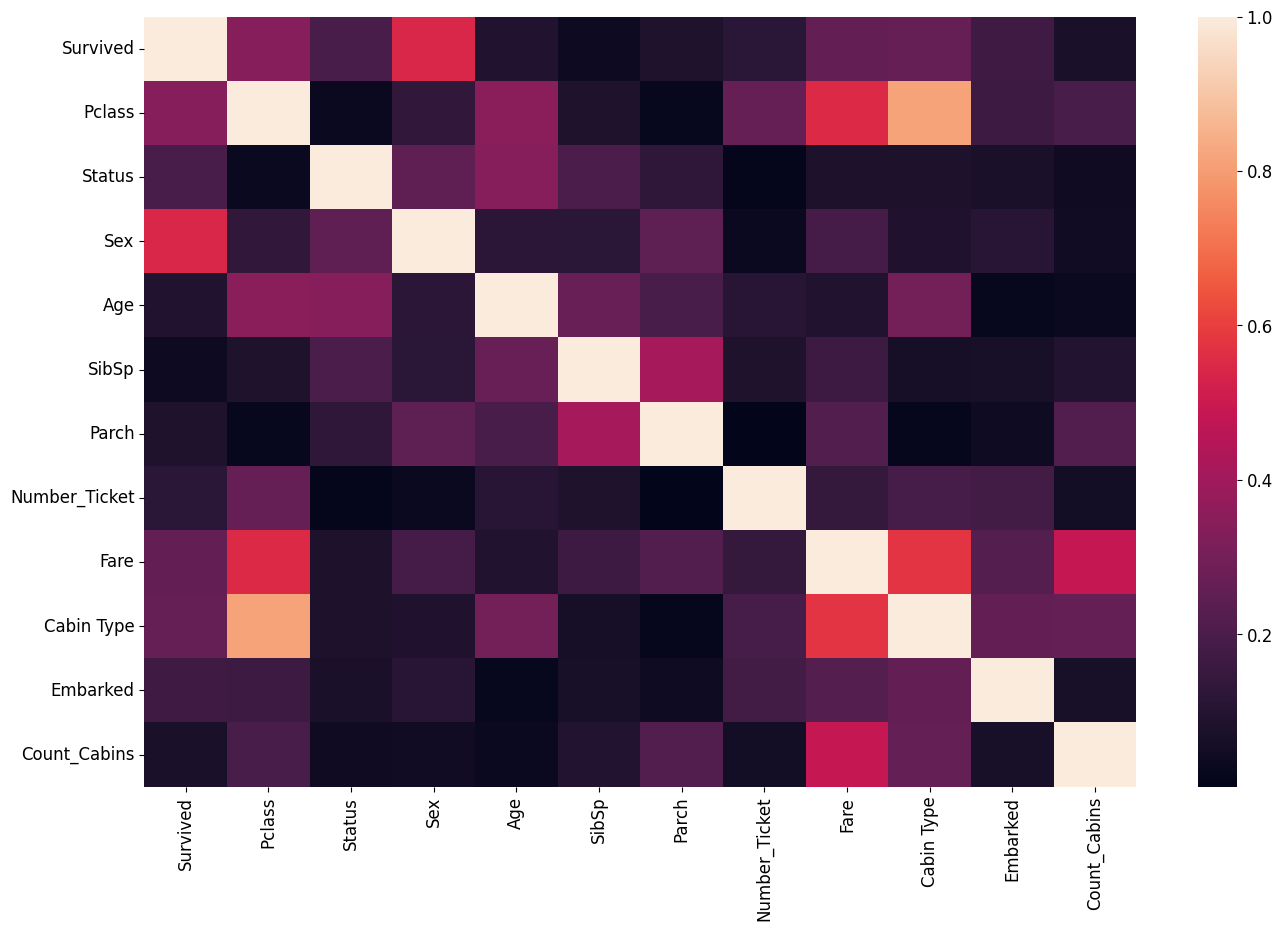

In [89]:
sns.heatmap(abs(df.corr()))

<Axes: xlabel='Embarked', ylabel='Age'>

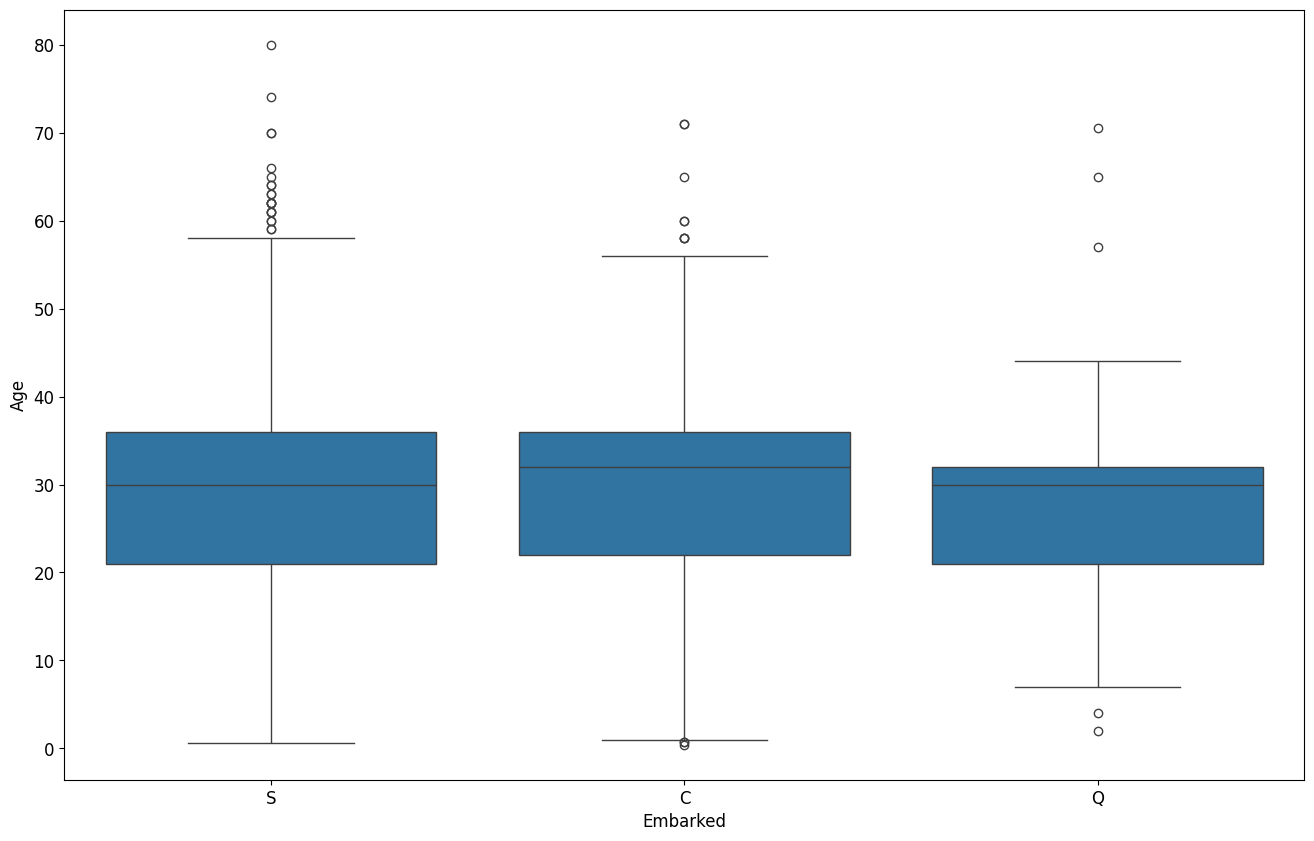

In [90]:
sns.boxplot(df_c, x="Embarked", y='Age')

<ipython-input-91-585e82e405c9>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = data,


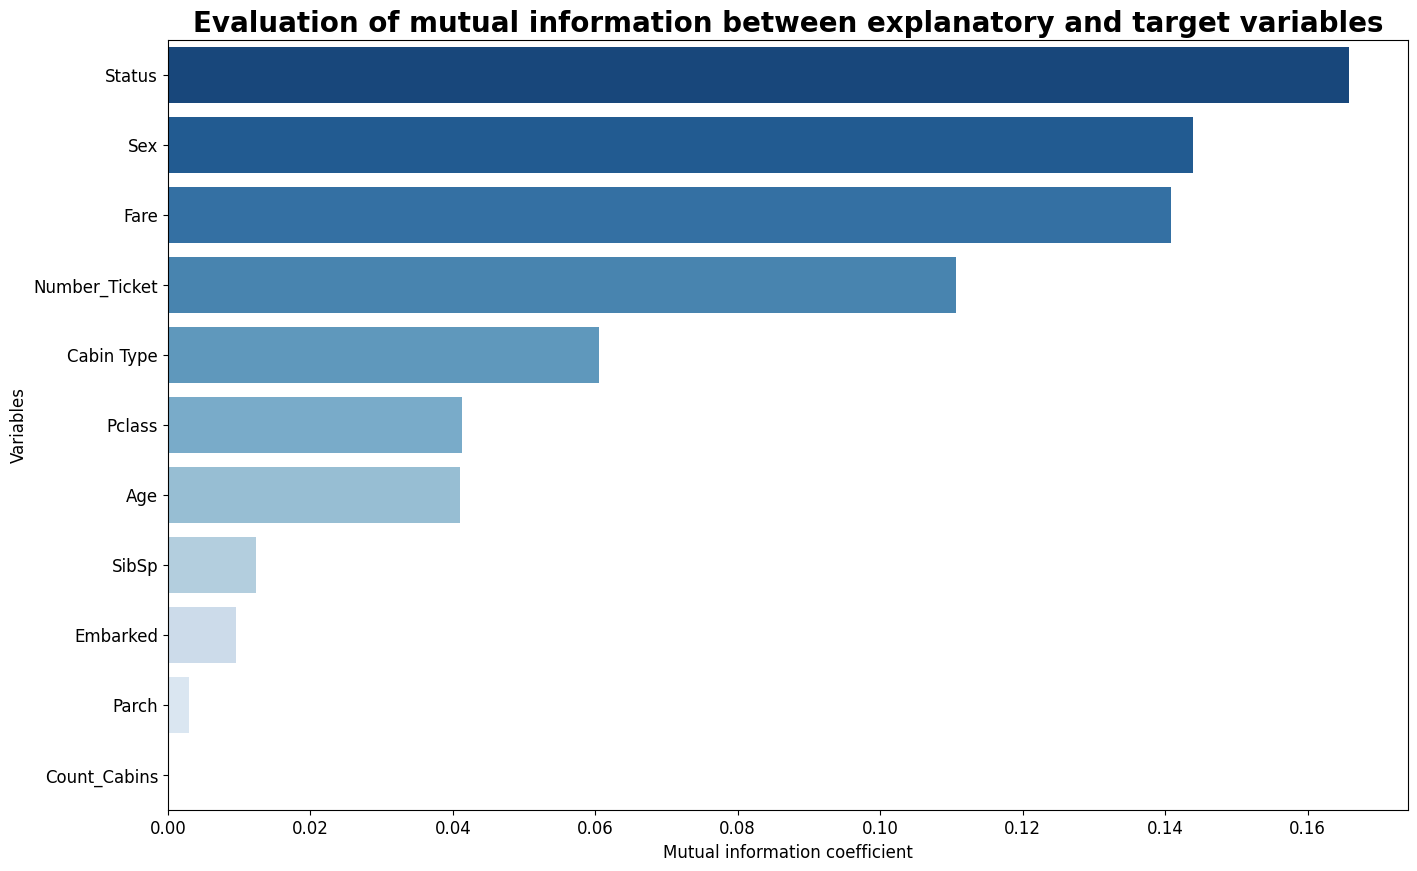

In [91]:
sns.barplot(data = data,
           x = 'Mutual information',
           y = data.index,
           palette = 'Blues_r')
plt.title('Evaluation of mutual information between explanatory and target variables', fontweight = 'bold')
plt.ylabel('Variables')
plt.xlabel('Mutual information coefficient')
plt.show()


    Параметр Status має найвищу оцінку взаємної інформації - цей атрибут містить багато інформації про цільову змінну
    і має з ним міцний зв’язок.

# Моделювання

## Logistic Regression

In [92]:
model_LRb = LogisticRegression(solver='liblinear', random_state=0).fit(X, y)

In [93]:
model_LRb.classes_

array([0, 1])

In [94]:
model_LRb.coef_

array([[-1.16589756e-03, -3.84392632e-03, -7.43857394e-04,
        -1.19640034e-02, -2.46653632e-04, -7.84875409e-07,
        -6.89305560e-07,  8.69699391e-03, -1.88052522e-03,
        -6.69808092e-04, -2.95960348e-04]])

In [95]:
df.head()

,Survived,Pclass,Status,Sex,Age,SibSp,Parch,Number_Ticket,Fare,Cabin Type,Embarked,Count_Cabins
0,0,3,11,1,22.0,1,0,21171,7.2500,5,2,1.0
1,1,1,12,0,38.0,1,0,17599,71.2833,2,0,1.0
2,1,3,8,0,26.0,0,0,3101282,7.9250,5,2,1.0
3,1,1,12,0,35.0,1,0,113803,53.1000,2,2,1.0
4,0,3,11,1,35.0,0,0,373450,8.0500,5,2,1.0


In [96]:
model_LRb.predict_proba(X)

array([[0.56779504, 0.43220496],
       [0.47469971, 0.52530029],
       [0.91874838, 0.08125162],
       ...,
       [0.52440364, 0.47559636],
       [0.54375637, 0.45624363],
       [0.65202327, 0.34797673]])

In [97]:
model_LRb.score(X, y)

0.6891133557800224

In [98]:
cm = confusion_matrix(y, model_LRb.predict(X))
cm

array([[500,  49],
       [228, 114]])

<Axes: >

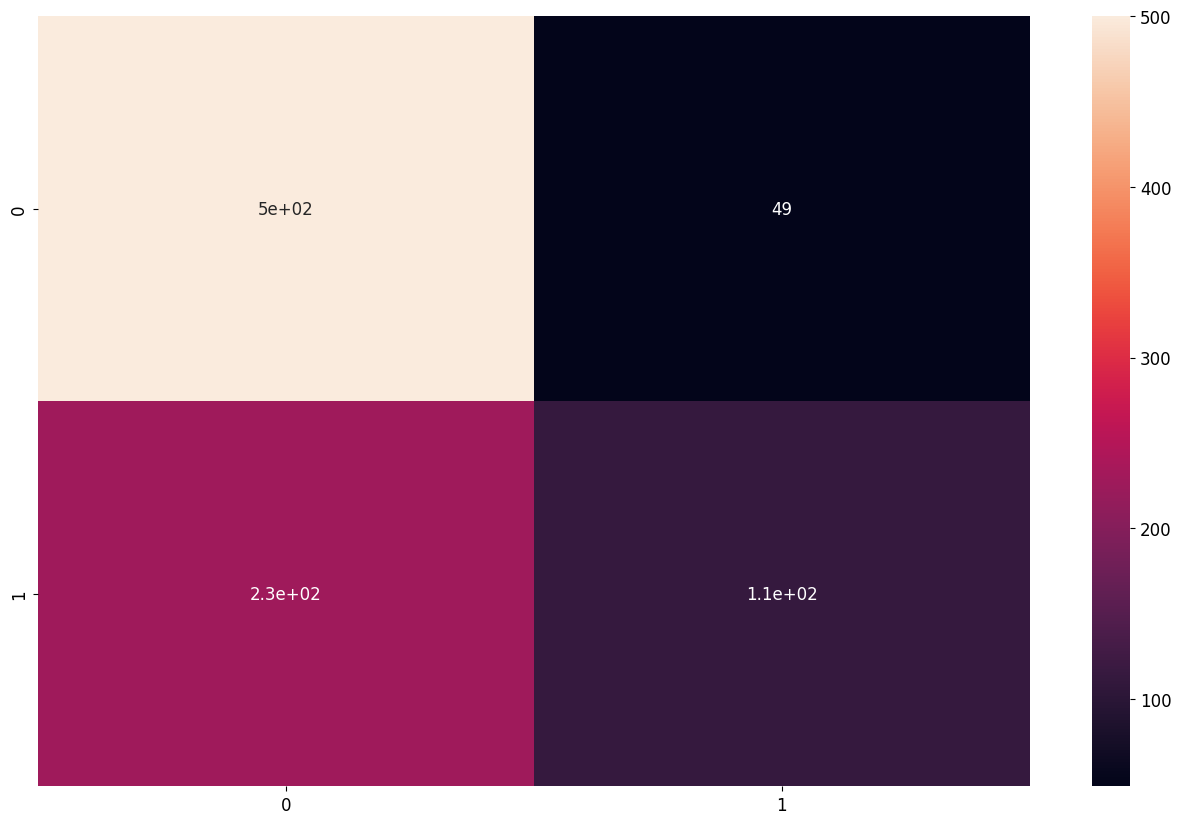

In [99]:
sns.heatmap(cm, annot=True)

In [100]:
model_LR = make_pipeline(
    OneHotEncoder(handle_unknown="ignore"),
    LogisticRegression(solver='liblinear', # newton-cg', 'lbfgs', 'sag', and 'saga'
                       random_state=0,
                       max_iter=500
                       )
)

In [101]:
cv_results = cross_validate(model_LR, X, y)
cv_results

{'fit_time': array([0.02907038, 0.01862001, 0.01501322, 0.01851201, 0.01817131]),
 'score_time': array([0.01413012, 0.00741529, 0.00716162, 0.00962067, 0.01019645]),
 'test_score': array([0.84357542, 0.8258427 , 0.84269663, 0.85393258, 0.85393258])}

In [102]:
scores = cv_results["test_score"]
print(f"The accuracy is: {scores.mean():.3f} ± {scores.std():.3f}")

The accuracy is: 0.844 ± 0.010


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000637 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 456
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

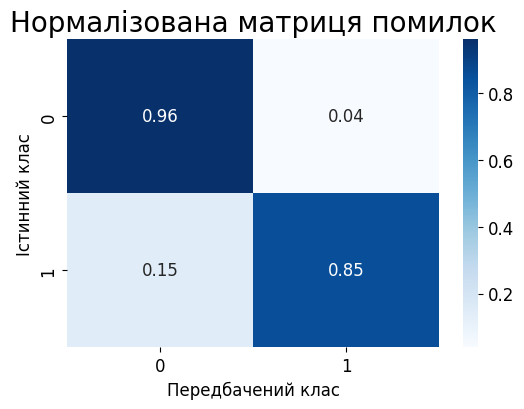

In [103]:
# LGBMClassifier — це реалізація алгоритму Gradient Boosting, який оптимізовано для швидкості та пам’яті.

# Побудова пайплайну
model_LGBM = Pipeline([
    ('classifier', LGBMClassifier(random_state=0))  # Класифікатор LightGBM
])

# Крос-валідація перед оптимізацією
cv_results = cross_validate(model_LGBM, X, y, cv=5, scoring='accuracy')
score_LGBM = cv_results["test_score"]
print(f"Accuracy (без оптимізації): {score_LGBM.mean():.3f} ± {score_LGBM.std():.3f}")

# Налаштування GridSearchCV
param_grid = {
    'classifier__n_estimators': [50, 100, 200],  # Кількість дерев у моделі
    'classifier__learning_rate': [0.01, 0.1, 0.2],  # Швидкість навчання
    'classifier__max_depth': [3, 5, 7],  # Максимальна глибина дерев
    'classifier__num_leaves': [15, 31, 63]  # Кількість листків
}

grid_search = GridSearchCV(
    estimator=model_LGBM,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Підбір гіперпараметрів
grid_search.fit(X, y)

print(f"Найкраща точність: {grid_search.best_score_:.3f}")
print(f"Найкращі параметри: {grid_search.best_params_}")

# Фінальна модель з найкращими параметрами
best_model = grid_search.best_estimator_
best_model.fit(X, y)

# Передбачення та обчислення accuracy
y_pred = best_model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy на тренувальних даних: {accuracy:.3f}")

# Матриця помилок
cm = confusion_matrix(y, y_pred)

# Нормалізована матриця помилок
cm_normalized = cm / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6, 4))
sns.heatmap(cm_normalized, annot=True, cmap="Blues", fmt=".2f", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Нормалізована матриця помилок")
plt.xlabel("Передбачений клас")
plt.ylabel("Істинний клас")
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:15:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:15:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:15:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:15:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:15:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Accuracy (без оптимізації): 0.825 ± 0.026


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:16:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Найкраща точність: 0.845
Найкращі параметри: {'classifier__colsample_bytree': 1.0, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 150, 'classifier__subsample': 1.0}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:16:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy на повних даних: 0.903

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       549
           1       0.91      0.83      0.87       342

    accuracy                           0.90       891
   macro avg       0.91      0.89      0.90       891
weighted avg       0.90      0.90      0.90       891



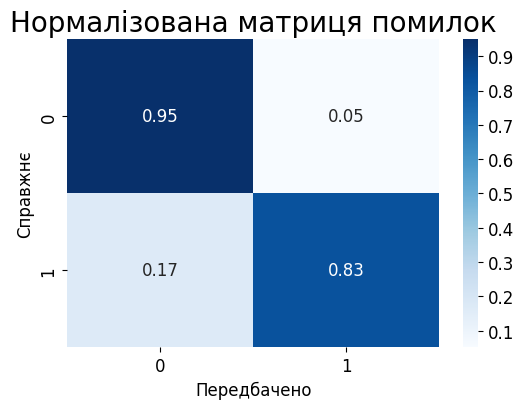

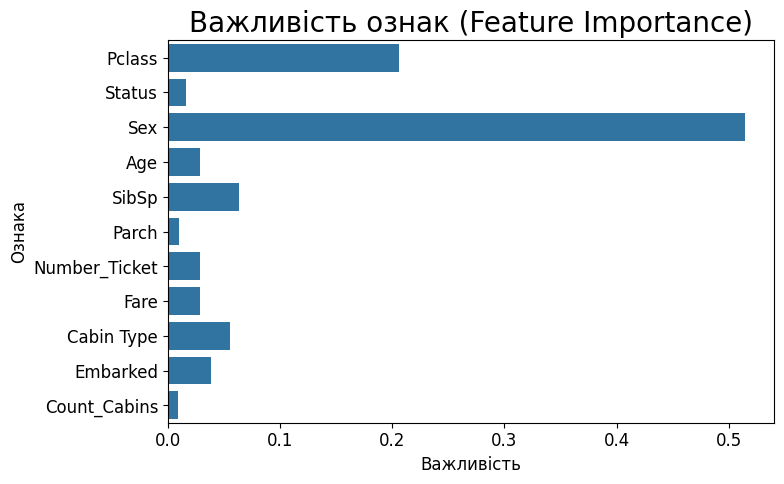

In [132]:

# 1. Побудова пайплайну
model_XGB = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0))
])

# 2. Крос-валідація перед оптимізацією
cv_results = cross_validate(model_XGB, X, y, cv=5, scoring='accuracy', return_train_score=False)
score_XGB = cv_results["test_score"]
print(f"Accuracy (без оптимізації): {score_XGB.mean():.3f} ± {score_XGB.std():.3f}")

# 3. Сітка гіперпараметрів
param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__learning_rate': [0.1, 0.2],
    'classifier__max_depth': [3, 5],
    'classifier__subsample': [0.8, 1.0],
    'classifier__colsample_bytree': [0.8, 1.0]
}

# 4. GridSearchCV
grid_search = GridSearchCV(
    estimator=model_XGB,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# 5. Підбір параметрів
grid_search.fit(X, y)

# 6. Результати оптимізації
print(f"Найкраща точність: {grid_search.best_score_:.3f}")
print(f"Найкращі параметри: {grid_search.best_params_}")

# 7. Побудова фінальної моделі
best_model = grid_search.best_estimator_
best_model.fit(X, y)

# 8. Прогноз і точність
y_pred = best_model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy на повних даних: {accuracy:.3f}")
print("\nClassification report:")
print(classification_report(y, y_pred))

# 9. Матриця помилок
cm = confusion_matrix(y, y_pred)
cm_normalized = cm / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6, 4))
sns.heatmap(cm_normalized, annot=True, cmap="Blues", fmt=".2f", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Нормалізована матриця помилок")
plt.xlabel("Передбачено")
plt.ylabel("Справжнє")
plt.show()

# 10. Важливість ознак
xgb = best_model.named_steps['classifier']
importances = xgb.feature_importances_
feature_names = X.columns if hasattr(X, 'columns') else [f"f{i}" for i in range(len(importances))]

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Важливість ознак (Feature Importance)")
plt.xlabel("Важливість")
plt.ylabel("Ознака")
plt.tight_layout()
plt.show()


Accuracy (без оптимізації): 0.843 ± 0.028
Найкраща точність: 0.846
Найкращі параметри: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 150, 'classifier__subsample': 0.8}
Accuracy на повних даних: 0.938

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       549
           1       0.95      0.88      0.92       342

    accuracy                           0.94       891
   macro avg       0.94      0.93      0.93       891
weighted avg       0.94      0.94      0.94       891



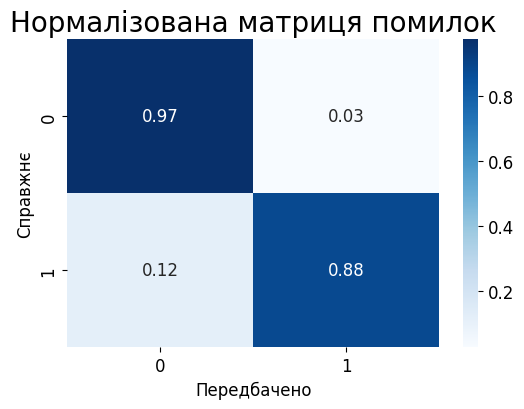

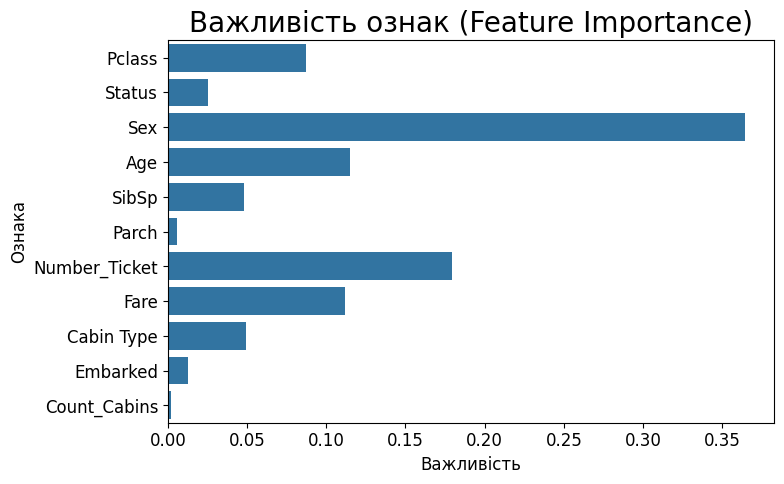

In [133]:

from sklearn.ensemble import GradientBoostingClassifier


# 1. Побудова пайплайну
model_boost = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GradientBoostingClassifier(random_state=0))
])

# 2. Крос-валідація перед оптимізацією
cv_results = cross_validate(model_boost, X, y, cv=5, scoring='accuracy', return_train_score=False)
score_boost = cv_results["test_score"]
print(f"Accuracy (без оптимізації): {score_boost.mean():.3f} ± {score_boost.std():.3f}")

# 3. Сітка гіперпараметрів
param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__learning_rate': [0.05, 0.1, 0.2],
    'classifier__max_depth': [3, 5],
    'classifier__subsample': [0.8, 1.0]
}

# 4. GridSearchCV
grid_search = GridSearchCV(
    estimator=model_boost,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# 5. Навчання моделі з пошуком параметрів
grid_search.fit(X, y)

# 6. Результати
print(f"Найкраща точність: {grid_search.best_score_:.3f}")
print(f"Найкращі параметри: {grid_search.best_params_}")

# 7. Фінальна модель
best_model = grid_search.best_estimator_
best_model.fit(X, y)

# 8. Передбачення і метрики
y_pred = best_model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy на повних даних: {accuracy:.3f}")
print("\nClassification report:")
print(classification_report(y, y_pred))

# 9. Матриця помилок
cm = confusion_matrix(y, y_pred)
cm_normalized = cm / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(6, 4))
sns.heatmap(cm_normalized, annot=True, cmap="Blues", fmt=".2f", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Нормалізована матриця помилок")
plt.xlabel("Передбачено")
plt.ylabel("Справжнє")
plt.show()

# 10. Важливість ознак
gb = best_model.named_steps['classifier']
importances = gb.feature_importances_
feature_names = X.columns if hasattr(X, 'columns') else [f"f{i}" for i in range(len(importances))]

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Важливість ознак (Feature Importance)")
plt.xlabel("Важливість")
plt.ylabel("Ознака")
plt.tight_layout()
plt.show()


# Final Model Evaluation Summary:
# The GradientBoostingClassifier (model_boost) achieved a high training accuracy of 0.938,
# demonstrating strong performance on the full dataset.
# However, the LGBMClassifier showed the best overall performance during cross-validation,
# reaching an accuracy of 0.920 and proving to be the most stable and efficient model.
#
# Based on these results, the LGBMClassifier is selected as the final model
# due to its balance between accuracy, speed, and generalization capability.